<a href="https://colab.research.google.com/github/Paipipaipi/-/blob/main/Master%20Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Generating Prott5 embedding
#remember require "/prott5_embedder.py" from huangging face, path is path
!python "/content/prott5_embedder.py" --input "/content/DNA_Test_129.fa" --output residue_embeddings_573.h5

2024-12-17 07:18:10.031083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 07:18:10.097370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 07:18:10.115886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 07:18:10.183307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-17 07:18:12.318214: W tensorflow/compiler/tf2

In [ ]:
import h5py
import pandas as pd

# 加载TXT数据
def load_txt_data(txt_filepath):
    with open(txt_filepath, 'r') as file:
        lines = file.readlines()

    data = []
    for i in range(0, len(lines), 3):
        protein_id = lines[i].strip()[1:]  # 移除开头的'>'
        sequence = lines[i+1].strip()
        label = lines[i+2].strip()
        data.append({'Protein ID': protein_id, 'Sequence': sequence, 'Label': label})

    return pd.DataFrame(data)

# 加载H5数据
def load_h5_data(h5_filepath, protein_ids):
    features = {}
    with h5py.File(h5_filepath, 'r') as hdf:
        for protein_id in protein_ids:
            if protein_id in hdf:
                features[protein_id] = hdf[protein_id][:]  # 读取所有数据

    return features

# 合并数据
def merge_data(txt_df, h5_features):
    # 将特征添加到DataFrame
    feature_rows = []
    for index, row in txt_df.iterrows():
        protein_id = row['Protein ID']
        if protein_id in h5_features:
            feature_vector = h5_features[protein_id].flatten()  # 可能需要调整形状或处理
            feature_rows.append(pd.Series([row['Label']] + feature_vector.tolist()))

    # 创建新的DataFrame
    if feature_rows:
        feature_df = pd.DataFrame(feature_rows)
        feature_df.columns = ['Label'] + [f'Feature_{i}' for i in range(feature_df.shape[1] - 1)]
        return feature_df
    else:
        return pd.DataFrame()


In [ ]:
import h5py

# 打开 h5 文件
file_path = '/content/residue_embeddings_573.h5'
with h5py.File(file_path, 'r') as f:
    # 查看文件中的所有数据集
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")

    f.visititems(print_structure)



Dataset: 4zm2_B, Shape: (111, 1024), Dtype: float32
Dataset: 5cr2_A, Shape: (143, 1024), Dtype: float32
Dataset: 5d2s_A, Shape: (111, 1024), Dtype: float32
Dataset: 5d8c_B, Shape: (143, 1024), Dtype: float32
Dataset: 5dac_A, Shape: (447, 1024), Dtype: float32
Dataset: 5dlo_A, Shape: (143, 1024), Dtype: float32
Dataset: 5dwb_A, Shape: (290, 1024), Dtype: float32
Dataset: 5dy0_A, Shape: (223, 1024), Dtype: float32
Dataset: 5ejk_A, Shape: (273, 1024), Dtype: float32
Dataset: 5eyb_A, Shape: (363, 1024), Dtype: float32
Dataset: 5f55_A, Shape: (707, 1024), Dtype: float32
Dataset: 5f7q_E, Shape: (398, 1024), Dtype: float32
Dataset: 5fd3_A, Shape: (111, 1024), Dtype: float32
Dataset: 5fdk_A, Shape: (183, 1024), Dtype: float32
Dataset: 5fgp_A, Shape: (143, 1024), Dtype: float32
Dataset: 5fmp_A, Shape: (204, 1024), Dtype: float32
Dataset: 5g5t_A, Shape: (672, 1024), Dtype: float32
Dataset: 5gke_A, Shape: (273, 1024), Dtype: float32
Dataset: 5gpc_A, Shape: (204, 1024), Dtype: float32
Dataset: 5gz

In [ ]:
import h5py
import pandas as pd
import csv

# 文件路径
txt_file_path = "/content/DNA-129_Test.txt"  # 替换为实际的 TXT 文件路径
h5_file_path = "/content/residue_embeddings_129.h5"     # 替换为实际的 H5 文件路径
output_file_path = "merged_output.csv"  # 输出文件路径

# 读取 TXT 文件
def read_txt_file(file_path):
    labels = []
    protein_ids = []
    with open(file_path, "r") as f:
        lines = f.readlines()
        for i in range(0, len(lines), 3):  # 每三行一组
            protein_id = lines[i].strip()[1:]  # 去掉 “>”
            label = int(lines[i + 2].strip()[0])  # 标签取残基序列的第一个字符 (0 或 1)
            labels.append(label)
            protein_ids.append(protein_id)
    return pd.DataFrame({"Label": labels, "ProteinID": protein_ids})

# 读取 H5 文件
def read_h5_file(file_path):
    with h5py.File(file_path, "r") as h5_file:
        return {key: h5_file[key][:] for key in h5_file.keys()}  # 提取每个蛋白的矩阵

# 合并数据
def merge_data(txt_data, h5_data):
    merged_data = []
    for idx, row in txt_data.iterrows():
        protein_id = row["ProteinID"]
        label = row["Label"]
        if protein_id in h5_data:
            features = h5_data[protein_id]  # 获取多行特征
            for feature_row in features:  # 遍历特征矩阵的每一行
                merged_data.append([label, protein_id] + feature_row.tolist())

        # 打印检查前 3 个蛋白
        if idx < 3:
            print(f"Protein ID: {protein_id}")
            print(f"Label: {label}")
            if protein_id in h5_data:
                print(f"Feature Shape: {h5_data[protein_id].shape}")
                print(f"First Feature Row: {h5_data[protein_id][0]}")
            else:
                print("Protein ID not found in H5 file.")
            print("=" * 50)

    return merged_data

# 主逻辑
if __name__ == "__main__":
    # Step 1: 读取 TXT 数据
    print("读取 TXT 文件...")
    txt_data = read_txt_file(txt_file_path)
    print(f"TXT 文件前 3 行: \n{txt_data.head(3)}\n")

    # Step 2: 读取 H5 数据
    print("读取 H5 文件...")
    h5_data = read_h5_file(h5_file_path)
    print(f"H5 文件中蛋白数量: {len(h5_data)}")

    # Step 3: 合并数据
    print("合并数据...")
    merged_data = merge_data(txt_data, h5_data)

    # 打印检查前 5 行合并后的数据
    print(f"合并数据的前 5 行: \n")
    for row in merged_data[:5]:
        print(row)

    # Step 4: 确认后保存为 CSV 文件
    if input("格式检查完成？输入 'yes' 确认保存: ").strip().lower() == "yes":
        # 定义列名
        columns = ["Label", "ProteinID"] + [f"Feature_{i}" for i in range(1024)]
        with open(output_file_path, "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerow(columns)  # 写入表头
            writer.writerows(merged_data)

        print(f"数据已合并并保存到 {output_file_path}")
    else:
        print("数据未保存，请修正格式后重试。")


读取 TXT 文件...
TXT 文件前 3 行: 
   Label ProteinID
0      1    5dy0_A
1      0    5fgp_A
2      0    5ejk_A

读取 H5 文件...
H5 文件中蛋白数量: 129
合并数据...
Protein ID: 5dy0_A
Label: 1
Feature Shape: (223, 1024)
First Feature Row: [-0.32045093 -0.4868112  -0.05403609 ... -0.0842388  -0.2770666
 -0.04482742]
Protein ID: 5fgp_A
Label: 0
Feature Shape: (143, 1024)
First Feature Row: [-0.08831209 -0.36718932 -0.11375786 ...  0.18070294 -0.19078784
  0.13574503]
Protein ID: 5ejk_A
Label: 0
Feature Shape: (273, 1024)
First Feature Row: [-0.17132263 -0.3351525   0.21836397 ... -0.08171805 -0.15232618
 -0.05433527]
合并数据的前 5 行: 

[1, '5dy0_A', -0.32045093178749084, -0.48681119084358215, -0.05403608828783035, 0.3077459931373596, -0.0739925280213356, 0.11149648576974869, -0.30648699402809143, 0.03160913288593292, 0.18410375714302063, 0.010258438065648079, -0.07072526961565018, -0.22188876569271088, -0.1736903190612793, 0.2404533326625824, -0.1580200046300888, 0.23554161190986633, 0.0611577108502388, 0.10352198034

In [ ]:
print(data.head())

   Label ProteinID  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0      0    3a01_A  -0.052243  -0.413946  -0.220764   0.298519  -0.064640   
1      0    3a01_A  -0.392361  -0.278883  -0.164858   0.349221  -0.307164   
2      0    3a01_A   0.037304  -0.106176  -0.191763   0.189156  -0.233975   
3      0    3a01_A   0.297728  -0.073661  -0.009382  -0.091957   0.025920   
4      0    3a01_A   0.347621  -0.120464  -0.054303   0.214193   0.066330   

   Feature_5  Feature_6  Feature_7  ...  Feature_1014  Feature_1015  \
0  -0.203552  -0.108073  -0.247184  ...     -0.385352     -0.467745   
1   0.031501  -0.008910  -0.161967  ...     -0.074952      0.117151   
2   0.365124  -0.013857  -0.345478  ...      0.095698      0.325805   
3   0.130138  -0.060306  -0.021202  ...     -0.148945      0.384417   
4   0.194008  -0.379981  -0.324756  ...      0.478898      0.235026   

   Feature_1016  Feature_1017  Feature_1018  Feature_1019  Feature_1020  \
0     -0.069468      0.101637     -

# Data preprocess,inc train and test

In [ ]:
import torch
import pandas as pd
D_feature = pd.read_csv("/content/drive/MyDrive/merged_output_573.csv")

In [ ]:
##注意，数据中的蛋白质id列的处理，目前的embedding没处理，但是在选择positive的时候会处理
feature_y_Benchmark_embeddings = D_feature.iloc[:, 0].values
feature_X_Benchmark_embeddings = np.zeros((feature_y_Benchmark_embeddings.shape[0], 1), dtype=float)
feature_X_Benchmark_embeddings = np.concatenate((feature_X_Benchmark_embeddings, D_feature.iloc[:, 0:].values), axis=1)
feature_X_Benchmark_embeddings = np.delete(feature_X_Benchmark_embeddings, 0, axis=1)

#1:2和原代码不同
feature_X_Benchmark_embeddings_positive = feature_X_Benchmark_embeddings[feature_X_Benchmark_embeddings[:, 0] == 1, 2:] #选出筛选出第 0 列值为 1 的所有行
feature_y_Benchmark_embeddings_positive = feature_X_Benchmark_embeddings[feature_X_Benchmark_embeddings[:, 0] == 1, 0].astype('int')
feature_X_Benchmark_embeddings_negative = feature_X_Benchmark_embeddings[feature_X_Benchmark_embeddings[:, 0] == 0, 2:]
feature_y_Benchmark_embeddings_negative = feature_X_Benchmark_embeddings[feature_X_Benchmark_embeddings[:, 0] == 0, 0].astype('int')

In [ ]:
print(feature_X_Benchmark_embeddings.shape)
print(feature_y_Benchmark_embeddings.shape)

print(feature_X_Benchmark_embeddings_positive.shape)
print(feature_y_Benchmark_embeddings_positive.shape)

print(feature_X_Benchmark_embeddings_negative.shape)
print(feature_y_Benchmark_embeddings_negative.shape)

(163009, 1026)
(163009,)
(15237, 1024)
(15237,)
(147772, 1024)
(147772,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
feature_X_Benchmark_embeddings_positive_train, feature_X_Benchmark_embeddings_positive_test, feature_y_Benchmark_embeddings_positive_train, feature_y_Benchmark_embeddings_positive_test = train_test_split(feature_X_Benchmark_embeddings_positive, feature_y_Benchmark_embeddings_positive, test_size=0.3, random_state=1)
feature_X_Benchmark_embeddings_negative_train, feature_X_Benchmark_embeddings_negative_test, feature_y_Benchmark_embeddings_negative_train, feature_y_Benchmark_embeddings_negative_test = train_test_split(feature_X_Benchmark_embeddings_negative, feature_y_Benchmark_embeddings_negative, test_size=0.3, random_state=1)

In [ ]:
print(feature_X_Benchmark_embeddings_positive_train.shape)
print(feature_X_Benchmark_embeddings_positive_test.shape)

print(feature_X_Benchmark_embeddings_negative_train.shape)
print(feature_X_Benchmark_embeddings_negative_test.shape)


(10665, 1024)
(4572, 1024)
(103440, 1024)
(44332, 1024)


In [ ]:

feature_X_Benchmark_embeddings_train = np.concatenate((feature_X_Benchmark_embeddings_positive_train, feature_X_Benchmark_embeddings_negative_train), axis=0)
feature_y_Benchmark_embeddings_train = np.concatenate((feature_y_Benchmark_embeddings_positive_train, feature_y_Benchmark_embeddings_negative_train), axis=0)
feature_X_Benchmark_embeddings_test = np.concatenate((feature_X_Benchmark_embeddings_positive_test, feature_X_Benchmark_embeddings_negative_test), axis=0)
feature_y_Benchmark_embeddings_test = np.concatenate((feature_y_Benchmark_embeddings_positive_test, feature_y_Benchmark_embeddings_negative_test), axis=0)

print(feature_X_Benchmark_embeddings_train.shape)
print(feature_y_Benchmark_embeddings_train.shape)

print(feature_X_Benchmark_embeddings_test.shape)
print(feature_y_Benchmark_embeddings_test.shape)

(114105, 1024)
(114105,)
(48904, 1024)
(48904,)


# Base layer MI to generate linear combination

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# import the classifiers :
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.naive_bayes import GaussianNB

import random
import pickle
import csv

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from collections import Counter

In [ ]:
def preprocess_the_dataset(feature_X):

    pt = PowerTransformer()
    pt.fit(feature_X)
    feature_X = pt.transform(feature_X)

    return feature_X

def model_fit(model_name, X_train, y_train):
    if model_name == 'RF':
        model = RandomForestClassifier(random_state=1)
    elif model_name == 'ET':
        model = ExtraTreesClassifier(random_state=1)
    elif model_name == 'DT':
        model = DecisionTreeClassifier(random_state=1)
    elif model_name == 'MLP':
        model = MLPClassifier(random_state=1, max_iter=4000)
    elif model_name == 'LR':
        model = LogisticRegression(class_weight='balanced', random_state=1, max_iter=1000)
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'XGB':
        model = XGBClassifier(random_state=1)
    else:
        print('Wrong model name')
        return

    try:
        model.fit(X_train, y_train)
    except:
        model = PLSRegression(n_components=1)
        model.fit(X_train, y_train)

    return model


def make_string(s):
    str = ''
    for i in s:
        str += i + ", "
    return str[:-2]

In [ ]:
#这里对 preprocess 函数的使用有所不同，需要注意
feature_X_Benchmark_embeddings_train = preprocess_the_dataset(feature_X_Benchmark_embeddings_train)
feature_X_Benchmark_embeddings_test = preprocess_the_dataset(feature_X_Benchmark_embeddings_test)

X = feature_X_Benchmark_embeddings_train.copy()
y = feature_y_Benchmark_embeddings_train.copy()

rus = RandomUnderSampler(random_state=1)
X, y = rus.fit_resample(X, y)

c = Counter(y)
print(c)

Counter({0: 10665, 1: 10665})


In [ ]:
probabilities = {}
model_names = ['XGB', 'NB', 'KNN', 'LR','MLP', 'DT', 'RF', 'ET']
for model_name in model_names:
    print(model_name+" model fit is running")
    model = model_fit(model_name, X, y)
    probabilities[model_name] = model.predict_proba(feature_X_Benchmark_embeddings_test)[:, 1].reshape(-1, 1)

XGB model fit is running
NB model fit is running
KNN model fit is running
LR model fit is running
MLP model fit is running
DT model fit is running
RF model fit is running
ET model fit is running


In [ ]:
with open('./model_wise_MI.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Learner Combination", "MI"])
    for learners in learner_combination:
        print(make_string(learners))
        prob = np.zeros((feature_X_Benchmark_embeddings_test.shape[0], 1), dtype=float)
        for learner in learners:
            prob = np.concatenate((prob, probabilities[learner]), axis=1)
        prob = np.delete(prob, 0, axis=1)

        realProb = np.zeros(prob.shape[0], dtype=float)
        for i in range(prob.shape[0]):
            realProb[i] = np.mean(prob[i])
        MI = mutual_info_classif(realProb.reshape(-1, 1), feature_y_Benchmark_embeddings_test, random_state=1)
        print('{0:.4f}'.format(np.mean(MI)))
        writer.writerow([make_string(learners), '{0:.4f}'.format(np.mean(MI))])

RF
0.0301
ET
0.0294
MLP
0.1199
LR
0.0555
XGB
0.0510
DT
0.0107
KNN
0.0405
NB
0.0037
RF, ET
0.0377
RF, MLP
0.1234
RF, LR
0.0626
RF, XGB
0.0567
RF, DT
0.0330
RF, KNN
0.0479
RF, NB
0.0244
ET, MLP
0.1239
ET, LR
0.0639
ET, XGB
0.0606
ET, DT
0.0326
ET, KNN
0.0501
ET, NB
0.0239
MLP, LR
0.1028
MLP, XGB
0.1152
MLP, DT
0.1201
MLP, KNN
0.1268
MLP, NB
0.0748
LR, XGB
0.0728
LR, DT
0.0585
LR, KNN
0.0762
LR, NB
0.0398
XGB, DT
0.0546
XGB, KNN
0.0694
XGB, NB
0.0415
DT, KNN
0.0399
DT, NB
0.0095
KNN, NB
0.0337
RF, ET, MLP
0.1222
RF, ET, LR
0.0681
RF, ET, XGB
0.0615
RF, ET, DT
0.0397
RF, ET, KNN
0.0545
RF, ET, NB
0.0322
RF, MLP, LR
0.1063
RF, MLP, XGB
0.1156
RF, MLP, DT
0.1124
RF, MLP, KNN
0.1243
RF, MLP, NB
0.0756
RF, LR, XGB
0.0759
RF, LR, DT
0.0527
RF, LR, KNN
0.0772
RF, LR, NB
0.0448
RF, XGB, DT
0.0511
RF, XGB, KNN
0.0713
RF, XGB, NB
0.0425
RF, DT, KNN
0.0431
RF, DT, NB
0.0284
RF, KNN, NB
0.0400
ET, MLP, LR
0.1077
ET, MLP, XGB
0.1160
ET, MLP, DT
0.1122
ET, MLP, KNN
0.1242
ET, MLP, NB
0.0765
ET, LR, XGB

# Meta layer

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# import the classifiers :
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.naive_bayes import GaussianNB

import random
import pickle
import csv

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,matthews_corrcoef,average_precision_score
from sklearn.metrics import balanced_accuracy_score


In [ ]:
def preprocess_the_dataset(feature_X):

    pt = PowerTransformer()
    pt.fit(feature_X)
    feature_X = pt.transform(feature_X)

    return feature_X

## 此时不用超参数调整
def model_fit(model_name, X_train, y_train):
    if model_name == 'RF':
        model = RandomForestClassifier(random_state=1)
    elif model_name == 'ET':
        model = ExtraTreesClassifier(random_state=1)
    elif model_name == 'DT':
        model = DecisionTreeClassifier(random_state=1)
    elif model_name == 'MLP':
        model = MLPClassifier(random_state=1, max_iter=4000)
    elif model_name == 'LR':
        model = LogisticRegression(class_weight='balanced', random_state=1, max_iter=1000)
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'XGB':
        model = XGBClassifier(random_state=1)
    else:
        print('Wrong model name')
        return

        model = PLSRegression(n_components=1)
        model.fit(X_train, y_train)

    return model


def make_string(s):
    str = ''
    for i in s:
        str += i + ", "
    return str[:-2]

In [ ]:
def create_subsample(X, y, percentage):
    X = np.concatenate((y.reshape(-1, 1), X), axis=1)

    feature_X_positive = X[X[:, 0] == 1, 1:]
    feature_y_positive = X[X[:, 0] == 1, 0].astype('int')

    feature_X_negative = X[X[:, 0] == 0, 1:]
    feature_y_negative = X[X[:, 0] == 0, 0].astype('int')

    feature_X_positive_test = feature_X_positive
    feature_y_positive_test = feature_y_positive

    feature_X_negative_train, feature_X_negative_test, feature_y_negative_train, feature_y_negative_test = train_test_split(
        feature_X_negative, feature_y_negative, test_size=percentage, random_state=1)

    # print(feature_X_positive_train.shape)
    # print(feature_X_positive_test.shape)
    #
    # print(feature_X_negative_train.shape)
    # print(feature_X_negative_test.shape)

    feature_X_test = np.concatenate((feature_X_positive_test, feature_X_negative_test), axis=0)
    feature_y_test = np.concatenate((feature_y_positive_test, feature_y_negative_test), axis=0)

    print("subsample shape:",)
    print(feature_X_test.shape)
    print(feature_y_test.shape)

    return feature_X_test, feature_y_test


In [ ]:
def create_base_layer(X, y):
    X = preprocess_the_dataset(X)
    percentages = [0.002, 0.002, 0.002, 0.002, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2]
    model_names = ['KNN', 'MLP']

    i = 0
    for percentage in percentages:
        trainX, trainy = create_subsample(X, y, percentage)
        for model_name in model_names:
            model = model_fit(model_name, trainX, trainy)

            filename = f'{model_name}_base_layer_{i}.sav'
            with open(filename, 'wb') as f:
                pickle.dump(model, f)

        i += 1

def load_model_and_get_BLP(X):
    X = preprocess_the_dataset(X)
    model_names = ['KNN', 'MLP']  # 只保留 KNN 和 MLP 两个模型

    prob = np.zeros((X.shape[0], 1), dtype=float)

    for i in range(10):  # 10次迭代
        for model_name in model_names:
            # 读取模型文件，只有 embedding 的逻辑
            filename = f'{model_name}_base_layer_{i}.sav'

            with open(filename, 'rb') as f:
                model = pickle.load(f)

            # 预测概率并拼接到 prob 数组中
            y_proba = model.predict_proba(X)[:, 1].reshape(-1, 1)  # 获取正类的概率
            prob = np.concatenate((prob, y_proba), axis=1)

    # 删除初始化的第一列零概率
    prob = np.delete(prob, 0, axis=1)
    return prob

In [ ]:
def find_metrics(model_name, y_test):
    if model_name == 'RF':
        model = RandomForestClassifier(random_state=1)
    elif model_name == 'ET':
        model = ExtraTreesClassifier(random_state=1)
    elif model_name == 'DT':
        model = DecisionTreeClassifier(random_state=1)
    elif model_name == 'MLP':
        model = MLPClassifier(random_state=1, max_iter=4000)
    elif model_name == 'LR':
        model = LogisticRegression(class_weight='balanced', random_state=1, max_iter=1000)
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'XGB':
        model = XGBClassifier(random_state=1)
    else:
        print('Wrong model name')
        return

    try:
        model.fit(X_train, y_train)
    except:
        print("Model training failed!")

    y_predict = model.predict(X_test)  # 预测标签
    y_proba = model.predict_proba(X_test)  # 预测概率


    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()  # y_true, y_pred

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    bal_acc = balanced_accuracy_score(y_test, y_predict)
    acc = accuracy_score(y_test, y_predict)

    if tp == 0 and fp == 0:
        prec = 0
    else:
        prec = tp / (tp + fp)

    if prec == 0 and sensitivity == 0:
        f1_score_1 = 0
    else:
        f1_score_1 = 2 * prec * sensitivity / (prec + sensitivity)
    mcc = matthews_corrcoef(y_test, y_predict)
    auc = roc_auc_score(y_test, y_proba[:, 1])
    auPR = average_precision_score(y_test, y_proba[:, 1])  # auPR

    return sensitivity, specificity, bal_acc, acc, prec, f1_score_1, mcc, auc, auPR


In [ ]:
X = feature_X_Benchmark_embeddings_train.copy()
y = feature_y_Benchmark_embeddings_train.copy()
create_base_layer(X, y)
X = feature_X_Benchmark_embeddings_test.copy()
y = feature_y_Benchmark_embeddings_test.copy()

In [ ]:
###X这个输入和Meta的超参数调整是一样的，是test而不是train
X = np.concatenate((X, load_model_and_get_BLP(X)), axis=1)

X = preprocess_the_dataset(X)

# balance the dataset :
rus = RandomUnderSampler(random_state=1)
X, y = rus.fit_resample(X, y)

c = Counter(y)
print(c)

Counter({0: 4572, 1: 4572})


In [ ]:
all_model_name = ['RF', 'ET', 'DT', 'MLP', 'LR', 'NB', 'KNN', 'XGB']

for model in all_model_name:
    random.seed(1)

    # Step 06 : Spliting with 10-FCV :
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    local_Sensitivity = []
    local_Specificity = []
    local_Balanced_acc = []
    local_Accuracy = []
    local_Precision = []
    local_AUPR = []
    local_F1 = []
    local_MCC = []
    local_AUC = []

    i = 1
    for train_index, test_index in cv.split(X, y):
        X_train = X[train_index]
        X_test = X[test_index]

        y_train = y[train_index]
        y_test = y[test_index]

        sensitivity, specificity, bal_acc, acc, prec, f1_score_1, mcc, auc, auPR = find_metrics(model, y_test)

        local_Sensitivity.append(sensitivity)
        local_Specificity.append(specificity)
        local_Balanced_acc.append(bal_acc)
        local_Accuracy.append(acc)
        local_Precision.append(prec)
        local_F1.append(f1_score_1)
        local_MCC.append(mcc)
        local_AUC.append(auc)
        local_AUPR.append(auPR)

        print(i, 'th iteration done')
        i = i + 1
        print('___________________________________________________________________________________________________________')

    print('classifier : ', model)
    print('Sensitivity : {0:.3f}'.format(np.mean(local_Sensitivity)))
    print('Specificity : {0:.3f}'.format(np.mean(local_Specificity)))
    print('Balanced_acc : {0:.3f}'.format(np.mean(local_Balanced_acc)))
    print('Accuracy : {0:.3f}'.format(np.mean(local_Accuracy)))
    print('Precision : {0:.3f}'.format(np.mean(local_Precision)))
    print('F1-score: {0:.3f}'.format(np.mean(local_F1)))
    print('MCC: {0:.3f}'.format(np.mean(local_MCC)))
    print('AUC: {0:.3f}'.format(np.mean(local_AUC)))
    print('auPR: {0:.3f}'.format(np.mean(local_AUPR)))

    with open('meta_layer_selection.csv', 'w') as f:
      writer = csv.writer(f)
      writer.writerow(['Classifier', 'Sensitivity', 'Specificity', 'Balanced Accuracy', 'Accuracy', 'Precision', 'F1-score', 'MCC', 'AUC', 'auPR'])

      writer.writerow([model, '{0:.3f}'.format(np.mean(local_Sensitivity)),
                                      '{0:.3f}'.format(np.mean(local_Specificity)),
                                      '{0:.3f}'.format(np.mean(local_Balanced_acc)),
                                      '{0:.3f}'.format(np.mean(local_Accuracy)),
                                      '{0:.3f}'.format(np.mean(local_Precision)), '{0:.3f}'.format(np.mean(local_F1)),
                                      '{0:.3f}'.format(np.mean(local_MCC)), '{0:.3f}'.format(np.mean(local_AUC)),
                                      '{0:.3f}'.format(np.mean(local_AUPR))])
      print('___________________________________________________________________________________________________________')

1 th iteration done
___________________________________________________________________________________________________________
2 th iteration done
___________________________________________________________________________________________________________
3 th iteration done
___________________________________________________________________________________________________________
4 th iteration done
___________________________________________________________________________________________________________
5 th iteration done
___________________________________________________________________________________________________________
6 th iteration done
___________________________________________________________________________________________________________
7 th iteration done
___________________________________________________________________________________________________________
8 th iteration done
____________________________________________________________________________________

# Hyperturning


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import optuna


# import the classifiers :
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.naive_bayes import GaussianNB

import random
import pickle
import csv

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,matthews_corrcoef,average_precision_score
from sklearn.metrics import balanced_accuracy_score

In [ ]:
def preprocess_the_dataset(feature_X):

    pt = PowerTransformer()
    pt.fit(feature_X)
    feature_X = pt.transform(feature_X)

    return feature_X

In [ ]:
feature_X_Benchmark_embeddings_train = np.concatenate((feature_X_Benchmark_embeddings_positive_train, feature_X_Benchmark_embeddings_negative_train), axis=0)
feature_y_Benchmark_embeddings_train = np.concatenate((feature_y_Benchmark_embeddings_positive_train, feature_y_Benchmark_embeddings_negative_train), axis=0)
feature_X_Benchmark_embeddings_test = np.concatenate((feature_X_Benchmark_embeddings_positive_test, feature_X_Benchmark_embeddings_negative_test), axis=0)
feature_y_Benchmark_embeddings_test = np.concatenate((feature_y_Benchmark_embeddings_positive_test, feature_y_Benchmark_embeddings_negative_test), axis=0)

print(feature_X_Benchmark_embeddings_test.shape)
print(feature_y_Benchmark_embeddings_test.shape)

X = feature_X_Benchmark_embeddings_train.copy()
y = feature_y_Benchmark_embeddings_train.copy()

X = preprocess_the_dataset(X)

# balance the dataset :
rus = RandomUnderSampler(random_state=1)
X, y = rus.fit_resample(X, y)

c = Counter(y)
print(c)

(48904, 1024)
(48904,)
Counter({0: 10665, 1: 10665})


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def objective(trial):
    # 定义超参数搜索范围
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50, 50), (100, 50), (100,)])
    activation = trial.suggest_categorical('activation', ['tanh', 'relu'])
    solver = trial.suggest_categorical('solver', ['sgd', 'adam'])
    alpha = trial.suggest_float('alpha', 1e-4, 1e-2, log=True)

    # 初始化 MLPClassifier
    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        random_state=1,
        max_iter=2000
    )

    # 定义评分指标
    scoring_metrics = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='macro'),
        'recall': make_scorer(recall_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    # 计算 5 折交叉验证指标，X和y在这里有了
    scores = {
        metric: cross_val_score(clf, X, y, cv=5, scoring=scoring_metrics[metric]).mean()
        for metric in scoring_metrics
    }

    # 打印（可选）每次试验的指标
    print(f"Trial {trial.number}: {scores}")

    # 返回 Accuracy 作为优化目标
    return scores['accuracy_score']

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # 运行 20 次优化

# 输出最优参数和最佳准确率
print("Best parameters:", study.best_params)
print("Best f1_score:", study.best_value)

[I 2024-12-15 03:38:21,911] A new study created in memory with name: no-name-b4f1487f-b15f-4f96-b2ed-e03d034434d3
[I 2024-12-15 04:21:05,946] Trial 0 finished with value: 0.7439287388654477 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.006781142271373619}. Best is trial 0 with value: 0.7439287388654477.


Trial 0: {'accuracy': 0.7439287388654477, 'precision': 0.7444474807928189, 'recall': 0.7439287388654477, 'f1': 0.7437905375129117}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 04:48:58,562] Trial 1 finished with value: 0.7878105954055321 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005741992977820157}. Best i

Trial 1: {'accuracy': 0.7878105954055321, 'precision': 0.7880839587833272, 'recall': 0.7878105954055321, 'f1': 0.787760169203694}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 05:17:01,837] Trial 2 finished with value: 0.7879512423816222 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0020798234600126315}. Best 

Trial 2: {'accuracy': 0.7879512423816222, 'precision': 0.7882312543711365, 'recall': 0.7879512423816222, 'f1': 0.7878995728661851}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 05:21:31,276] Trial 3 finished with value: 0.7286919831223628 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001261861264633021}. Bes

Trial 3: {'accuracy': 0.7286919831223628, 'precision': 0.7289711264970089, 'recall': 0.7286919831223628, 'f1': 0.7286092208197449}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 05:50:06,503] Trial 4 finished with value: 0.787669948429442 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011096672917816105}. Best i

Trial 4: {'accuracy': 0.787669948429442, 'precision': 0.7879271403524262, 'recall': 0.787669948429442, 'f1': 0.7876224113177861}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 06:33:08,459] Trial 5 finished with value: 0.7439756211908111 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.000670273815928153}. Best i

Trial 5: {'accuracy': 0.7439756211908111, 'precision': 0.7445082030024857, 'recall': 0.7439756211908112, 'f1': 0.7438340242064949}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:05:45,757] Trial 6 finished with value: 0.7229254571026723 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.003056806025385174}. Bes

Trial 6: {'accuracy': 0.7229254571026723, 'precision': 0.7231077005831389, 'recall': 0.7229254571026722, 'f1': 0.7228689535853754}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:11:42,639] Trial 7 finished with value: 0.7926863572433194 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.005853417818308563}. Bes

Trial 7: {'accuracy': 0.7926863572433194, 'precision': 0.7931431802052051, 'recall': 0.7926863572433194, 'f1': 0.7926050820900741}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:17:23,100] Trial 8 finished with value: 0.7928270042194093 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00012362386823515926}. B

Trial 8: {'accuracy': 0.7928270042194093, 'precision': 0.7929862878549621, 'recall': 0.7928270042194093, 'f1': 0.7927990365675613}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:22:43,661] Trial 9 finished with value: 0.7835443037974683 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005889347754771754}. Be

Trial 9: {'accuracy': 0.7835443037974683, 'precision': 0.7837056939335734, 'recall': 0.7835443037974683, 'f1': 0.7835147742697135}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:30:31,305] Trial 10 finished with value: 0.8013127051101735 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00012134846711460736}.

Trial 10: {'accuracy': 0.8013127051101735, 'precision': 0.8018227660976697, 'recall': 0.8013127051101735, 'f1': 0.8012320176304535}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:37:35,958] Trial 11 finished with value: 0.8056258790436006 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00010048791010161727}.

Trial 11: {'accuracy': 0.8056258790436006, 'precision': 0.8062454491322681, 'recall': 0.8056258790436006, 'f1': 0.8055254407533294}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:45:58,064] Trial 12 finished with value: 0.8081106422878575 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001031295172037809}. 

Trial 12: {'accuracy': 0.8081106422878575, 'precision': 0.808844911638937, 'recall': 0.8081106422878575, 'f1': 0.80799585022006}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 07:53:34,268] Trial 13 finished with value: 0.8023441162681669 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0002817480655185866}. 

Trial 13: {'accuracy': 0.8023441162681669, 'precision': 0.8029271068601951, 'recall': 0.8023441162681669, 'f1': 0.8022517330916484}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 08:01:17,254] Trial 14 finished with value: 0.8056258790436006 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0002746709156271248}. 

Trial 14: {'accuracy': 0.8056258790436006, 'precision': 0.8064418291671481, 'recall': 0.8056258790436006, 'f1': 0.8054996929454319}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 08:09:10,065] Trial 15 finished with value: 0.7888420065635255 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0002459089444956482}. 

Trial 15: {'accuracy': 0.7888420065635255, 'precision': 0.7896032399706812, 'recall': 0.7888420065635255, 'f1': 0.7886939207517925}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 08:17:27,334] Trial 16 finished with value: 0.806797937177684 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00010103868404387927}. 

Trial 16: {'accuracy': 0.806797937177684, 'precision': 0.8074270884511423, 'recall': 0.806797937177684, 'f1': 0.8067000377100173}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 08:24:53,431] Trial 17 finished with value: 0.8074074074074072 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00023456011989467733}.

Trial 17: {'accuracy': 0.8074074074074072, 'precision': 0.8079698527764029, 'recall': 0.8074074074074072, 'f1': 0.8073187651967704}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 08:31:32,096] Trial 18 finished with value: 0.7426629160806376 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019300954034760437}.

Trial 18: {'accuracy': 0.7426629160806376, 'precision': 0.7432443855965929, 'recall': 0.7426629160806376, 'f1': 0.7425089298100144}


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
[I 2024-12-15 08:39:25,724] Trial 19 finished with value: 0.8071729957805907 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005070534326575957}. 

Trial 19: {'accuracy': 0.8071729957805907, 'precision': 0.807800246886664, 'recall': 0.8071729957805907, 'f1': 0.8070750823450933}
Best parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001031295172037809}
Best accuracy: 0.8081106422878575


## KNN

In [ ]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 定义目标函数
def objective(trial):
    # 定义待优化的超参数
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)  # 邻居数
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # 加权策略
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan'])  # 距离度量

    # 初始化 KNN 模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    # 定义评分指标
    scoring_metrics = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='macro'),
        'recall': make_scorer(recall_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    # 计算 5 折交叉验证指标，X和y在这里有了
    scores = {
        metric: cross_val_score(clf, X, y, cv=5, scoring=scoring_metrics[metric]).mean()
        for metric in scoring_metrics
    }

    # 打印（可选）每次试验的指标
    print(f"Trial {trial.number}: {scores}")

    # 返回 Accuracy 作为优化目标
    return scores['accuracy_score']

In [ ]:
# 创建 Optuna Study 并进行超参数优化
study = optuna.create_study(direction='maximize')  # 最大化准确率
study.optimize(objective, n_trials=20)  # 进行 20 次试验

# 输出最佳参数和结果
print("Best Parameters:", study.best_params)
print("Best f1_score:", study.best_value)

[I 2024-12-15 11:14:29,745] A new study created in memory with name: no-name-3701b60c-feba-4eab-a0d2-bdb5b3e5b572
[I 2024-12-15 11:14:56,413] Trial 0 finished with value: 0.6421472105016409 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.6421472105016409.


Trial 0: {'accuracy': 0.6421472105016409, 'precision': 0.6486897629017168, 'recall': 0.6421472105016409, 'f1': 0.6381788273012992}


[I 2024-12-15 11:21:56,917] Trial 1 finished with value: 0.6528832630098453 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.6528832630098453.


Trial 1: {'accuracy': 0.6528832630098453, 'precision': 0.6574592134698074, 'recall': 0.6528832630098453, 'f1': 0.6503605756290488}


[I 2024-12-15 11:22:23,199] Trial 2 finished with value: 0.6421472105016409 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6528832630098453.


Trial 2: {'accuracy': 0.6421472105016409, 'precision': 0.6486897629017168, 'recall': 0.6421472105016409, 'f1': 0.6381788273012992}


[I 2024-12-15 11:22:47,867] Trial 3 finished with value: 0.6086732301922175 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6528832630098453.


Trial 3: {'accuracy': 0.6086732301922175, 'precision': 0.6385949422646746, 'recall': 0.6086732301922175, 'f1': 0.5863010732826222}


[I 2024-12-15 11:23:12,044] Trial 4 finished with value: 0.6187060478199718 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6528832630098453.


Trial 4: {'accuracy': 0.6187060478199718, 'precision': 0.6513184992541323, 'recall': 0.6187060478199718, 'f1': 0.5969270002006484}


[I 2024-12-15 11:23:39,014] Trial 5 finished with value: 0.606657290201594 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6528832630098453.


Trial 5: {'accuracy': 0.606657290201594, 'precision': 0.6357675922004408, 'recall': 0.606657290201594, 'f1': 0.5843180973403233}


[I 2024-12-15 11:30:39,493] Trial 6 finished with value: 0.5941397093295827 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.6528832630098453.


Trial 6: {'accuracy': 0.5941397093295827, 'precision': 0.6260617501455501, 'recall': 0.5941397093295827, 'f1': 0.5667339615885446}


[I 2024-12-15 11:31:06,125] Trial 7 finished with value: 0.6030942334739804 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6528832630098453.


Trial 7: {'accuracy': 0.6030942334739804, 'precision': 0.6342577375379153, 'recall': 0.6030942334739804, 'f1': 0.5785762884394965}
Trial 8: {'accuracy': 0.6528832630098453, 'precision': 0.6574592134698074, 'recall': 0.6528832630098453, 'f1': 0.6503605756290488}


[I 2024-12-15 11:38:31,223] Trial 9 finished with value: 0.6053914674167838 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6528832630098453.


Trial 9: {'accuracy': 0.6053914674167838, 'precision': 0.6376441150263041, 'recall': 0.605391467416784, 'f1': 0.5807839947707244}


[I 2024-12-15 11:45:31,203] Trial 10 finished with value: 0.6690576652601969 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 10: {'accuracy': 0.6690576652601969, 'precision': 0.6849869358109215, 'recall': 0.6690576652601969, 'f1': 0.6617829159255727}


[I 2024-12-15 11:52:33,516] Trial 11 finished with value: 0.6690576652601969 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 11: {'accuracy': 0.6690576652601969, 'precision': 0.6849869358109215, 'recall': 0.6690576652601969, 'f1': 0.6617829159255727}


[I 2024-12-15 11:59:33,034] Trial 12 finished with value: 0.6690576652601969 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 12: {'accuracy': 0.6690576652601969, 'precision': 0.6849869358109215, 'recall': 0.6690576652601969, 'f1': 0.6617829159255727}


[I 2024-12-15 12:06:33,075] Trial 13 finished with value: 0.6690576652601969 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 13: {'accuracy': 0.6690576652601969, 'precision': 0.6849869358109215, 'recall': 0.6690576652601969, 'f1': 0.6617829159255727}


[I 2024-12-15 12:13:33,048] Trial 14 finished with value: 0.6574777308954524 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 14: {'accuracy': 0.6574777308954524, 'precision': 0.6778361359221515, 'recall': 0.6574777308954524, 'f1': 0.6474272034442704}


[I 2024-12-15 12:20:33,009] Trial 15 finished with value: 0.6670886075949367 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 15: {'accuracy': 0.6670886075949367, 'precision': 0.6889041342342647, 'recall': 0.6670886075949367, 'f1': 0.6572440621750968}


[I 2024-12-15 12:27:33,228] Trial 16 finished with value: 0.6161275199249883 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 16: {'accuracy': 0.6161275199249883, 'precision': 0.6456873603356528, 'recall': 0.6161275199249884, 'f1': 0.5956179714639489}


[I 2024-12-15 12:34:33,818] Trial 17 finished with value: 0.6307079231129864 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 17: {'accuracy': 0.6307079231129864, 'precision': 0.6636207315473666, 'recall': 0.6307079231129864, 'f1': 0.611174872263167}


[I 2024-12-15 12:41:33,909] Trial 18 finished with value: 0.6574777308954524 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 18: {'accuracy': 0.6574777308954524, 'precision': 0.6778361359221515, 'recall': 0.6574777308954524, 'f1': 0.6474272034442704}


[I 2024-12-15 12:48:34,235] Trial 19 finished with value: 0.6422409751523676 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 10 with value: 0.6690576652601969.


Trial 19: {'accuracy': 0.6422409751523676, 'precision': 0.6641481589870033, 'recall': 0.6422409751523677, 'f1': 0.6299229179617769}
Best Parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}
Best Accuracy: 0.6690576652601969


## Meta

选择了XGB

In [1]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# import the classifiers :
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.naive_bayes import GaussianNB

import random
import pickle
import csv

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,matthews_corrcoef,average_precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-4b0fb134aff8>", line 3, in <cell line: 3>
    from imblearn.under_sampling import RandomUnderSampler
  File "/usr/local/lib/python3.10/dist-packages/imblearn/__init__.py", line 52, in <module>
    from . import (
  File "/usr/local/lib/python3.10/dist-packages/imblearn/combine/__init__.py", line 5, in <module>
    from ._smote_enn import SMOTEENN
  File "/usr/local/lib/python3.10/dist-packages/imblearn/combine/_smote_enn.py", line 9, in <module>
    from sklearn.base import clone
  File "/usr/local/lib/python3.10/dist-packages/sklearn/__init__.py", line 73, in <module>
    from .base import clone  # noqa: E402
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 19, in <module>
    from .utils._estimator_html_repr import _HTMLDocumentationLinkMixin, es

TypeError: object of type 'NoneType' has no len()

In [ ]:
def preprocess_the_dataset(feature_X):

    pt = PowerTransformer()
    pt.fit(feature_X)
    feature_X = pt.transform(feature_X)

    return feature_X


def model_fit(model_name, X_train, y_train):
    if model_name == 'RF':
        model = RandomForestClassifier(random_state=1)
    elif model_name == 'ET':
        model = ExtraTreesClassifier(random_state=1)
    elif model_name == 'DT':
        model = DecisionTreeClassifier(random_state=1)
    elif model_name == 'MLP':
        model = MLPClassifier(random_state=1, max_iter=4000, activation='relu', alpha=0, hidden_layer_sizes=(100,50), solver='adam')
    elif model_name == 'LR':
        model = LogisticRegression(class_weight='balanced', random_state=1, max_iter=1000)
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
    elif model_name == 'XGB':
        model = XGBClassifier(random_state=1)
    else:
        print('Wrong model name')
        return

    try:
        model.fit(X_train, y_train)
    except:
        model = PLSRegression(n_components=1)
        model.fit(X_train, y_train)

    return model

def make_string(s):
    str = ''
    for i in s:
        str += i + ", "
    return str[:-2]


def create_subsample(X, y, percentage):
    X = np.concatenate((y.reshape(-1, 1), X), axis=1)

    feature_X_positive = X[X[:, 0] == 1, 1:]
    feature_y_positive = X[X[:, 0] == 1, 0].astype('int')

    feature_X_negative = X[X[:, 0] == 0, 1:]
    feature_y_negative = X[X[:, 0] == 0, 0].astype('int')

    feature_X_positive_test = feature_X_positive
    feature_y_positive_test = feature_y_positive

    feature_X_negative_train, feature_X_negative_test, feature_y_negative_train, feature_y_negative_test = train_test_split(
        feature_X_negative, feature_y_negative, test_size=percentage, random_state=1)

    feature_X_test = np.concatenate((feature_X_positive_test, feature_X_negative_test), axis=0)
    feature_y_test = np.concatenate((feature_y_positive_test, feature_y_negative_test), axis=0)

    print("subsample shape:",)
    print(feature_X_test.shape)
    print(feature_y_test.shape)

    return feature_X_test, feature_y_test


def create_base_layer(X, y):
    X = preprocess_the_dataset(X)
    percentages = [0.002, 0.002, 0.002, 0.002, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2]
    model_names = ['KNN', 'MLP']

    i = 0
    for percentage in percentages:
        trainX, trainy = create_subsample(X, y, percentage)
        for model_name in model_names:
            model = model_fit(model_name, trainX, trainy)

            filename = f'{model_name}_base_layer_{i}.sav'
            with open(filename, 'wb') as f:
                pickle.dump(model, f)

        i += 1


def load_model_and_get_BLP(X):
    X = preprocess_the_dataset(X)
    model_names = ['KNN','MLP']

    prob = np.zeros((X.shape[0], 1), dtype=float)
    for itr in range(10):
        for model_name in model_names:
            filename = f'{model_name}_base_layer_{itr}.sav'
            with open(filename, 'rb') as f:
                model = pickle.load(f)
                if model_name == 'PLS':
                    p_all = []
                    p_all.append([1 - np.abs(item[0]) for item in model.predict(X)])
                    p_all.append([np.abs(item[0]) for item in model.predict(X)])
                    y_proba = np.transpose(np.array(p_all))[:, 1].reshape(-1, 1)
                else:
                    y_proba = model.predict_proba(X)[:, 1].reshape(-1, 1)
                prob = np.concatenate((prob, y_proba), axis=1)
    prob = np.delete(prob, 0, axis=1)

    return prob




In [ ]:
X = feature_X_Benchmark_embeddings_train.copy()
y = feature_y_Benchmark_embeddings_train.copy()
create_base_layer(X, y) ## 不用preprocess，因为creat base layer 层已经包含了

In [ ]:
X = feature_X_Benchmark_embeddings_test.copy()
y = feature_y_Benchmark_embeddings_test.copy()
X = np.concatenate((X, load_model_and_get_BLP(X)), axis=1)

In [ ]:
# balance the dataset :
rus = RandomUnderSampler(random_state=1)
X, y = rus.fit_resample(X, y)

c = Counter(y)
print(c)

In [ ]:
# Define objective function for Optuna optimization
def objective(trial):
    # Define hyperparameter space
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 1e-5, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    }

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    metrics = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = XGBClassifier(**params, use_label_encoder=False)
        model.fit(X_train, y_train, verbose=False)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        metrics.append(accuracy)

    return np.mean(metrics)

In [ ]:
# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best hyperparameters:", study.best_params)

# Train XGBoost model with the best parameters on full dataset
final_model = XGBClassifier(**study.best_params, use_label_encoder=False)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Collect metrics for evaluation
local_Sensitivity = []
local_Specificity = []
local_Balanced_acc = []
local_Accuracy = []
local_Precision = []
local_F1 = []
local_MCC = []
local_AUC = []
local_auPR = []
local_TP = []
local_TN = []
local_FP = []
local_FN = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    final_model.fit(X_train, y_train, verbose=False)
    y_pred = final_model.predict(X_test)
    y_pred_proba = final_model.predict_proba(X_test)[:, 1]

    # Calculate confusion matrix and extract TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    local_TP.append(tp)
    local_TN.append(tn)
    local_FP.append(fp)
    local_FN.append(fn)

    # Calculate metrics
    local_Sensitivity.append(tp / (tp + fn))  # Recall/Sensitivity
    local_Specificity.append(tn / (tn + fp))  # Specificity
    local_Accuracy.append(accuracy_score(y_test, y_pred))
    local_Precision.append(precision_score(y_test, y_pred))
    local_F1.append(f1_score(y_test, y_pred))
    local_MCC.append(matthews_corrcoef(y_test, y_pred))
    local_AUC.append(roc_auc_score(y_test, y_pred_proba))
    local_auPR.append(roc_auc_score(y_test, y_pred_proba))  # Example for auPR

print("Final Metrics")
print("Accuracy: {:.3f}".format(np.mean(local_Accuracy)))
print("Precision: {:.3f}".format(np.mean(local_Precision)))
print("Sensitivity (Recall): {:.3f}".format(np.mean(local_Sensitivity)))
print("Specificity: {:.3f}".format(np.mean(local_Specificity)))
print("F1-score: {:.3f}".format(np.mean(local_F1)))
print("MCC: {:.3f}".format(np.mean(local_MCC)))
print("AUC: {:.3f}".format(np.mean(local_AUC)))
print("auPR: {:.3f}".format(np.mean(local_auPR)))
print("True Positives: {:.3f}".format(np.mean(local_TP)))
print("True Negatives: {:.3f}".format(np.mean(local_TN)))
print("False Positives: {:.3f}".format(np.mean(local_FP)))
print("False Negatives: {:.3f}".format(np.mean(local_FN)))


In [ ]:
print("Best hyperparameters:", study.best_params)

# Train

In [ ]:
def preprocess_the_dataset(feature_X):

    pt = PowerTransformer()
    pt.fit(feature_X)
    feature_X = pt.transform(feature_X)

    return feature_X


def model_fit(model_name, X_train, y_train):
    if model_name == 'RF':
        model = RandomForestClassifier(random_state=1)
    elif model_name == 'ET':
        model = ExtraTreesClassifier(random_state=1)
    elif model_name == 'DT':
        model = DecisionTreeClassifier(random_state=1)
    elif model_name == 'MLP':
        model = MLPClassifier(random_state=1, max_iter=4000, activation='relu', alpha=0, hidden_layer_sizes=(100,50), solver='adam')
    elif model_name == 'LR':
        model = LogisticRegression(class_weight='balanced', random_state=1, max_iter=1000)
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
    elif model_name == 'XGB':
        model = XGBClassifier(
    n_estimators=286,           # 树的数量
    max_depth=9,                # 树的最大深度
    learning_rate=0.03,         # 学习率
    gamma=0.03,                  # 损失函数的正则化参数
    subsample=0.76,              # 样本采样比例
    colsample_bytree=0.71,       # 树的列采样比例
    reg_alpha=6.17,              # L1 正则化系数
    reg_lambda=7.11,             # L2 正则化系数
    random_state=1              # 随机种子
)

    else:
        print('Wrong model name')
        return

    try:
        model.fit(X_train, y_train)
    except:
        model = PLSRegression(n_components=1)
        model.fit(X_train, y_train)

    return model

def make_string(s):
    str = ''
    for i in s:
        str += i + ", "
    return str[:-2]


def create_subsample(X, y, percentage):
    X = np.concatenate((y.reshape(-1, 1), X), axis=1)

    feature_X_positive = X[X[:, 0] == 1, 1:]
    feature_y_positive = X[X[:, 0] == 1, 0].astype('int')

    feature_X_negative = X[X[:, 0] == 0, 1:]
    feature_y_negative = X[X[:, 0] == 0, 0].astype('int')

    feature_X_positive_test = feature_X_positive
    feature_y_positive_test = feature_y_positive

    feature_X_negative_train, feature_X_negative_test, feature_y_negative_train, feature_y_negative_test = train_test_split(
        feature_X_negative, feature_y_negative, test_size=percentage, random_state=1)

    feature_X_test = np.concatenate((feature_X_positive_test, feature_X_negative_test), axis=0)
    feature_y_test = np.concatenate((feature_y_positive_test, feature_y_negative_test), axis=0)

    print("subsample shape:",)
    print(feature_X_test.shape)
    print(feature_y_test.shape)

    return feature_X_test, feature_y_test


def create_base_layer(X, y):
    X = preprocess_the_dataset(X)
    percentages = [0.002, 0.002, 0.002, 0.002, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2]
    model_names = ['KNN', 'MLP']

    i = 0
    for percentage in percentages:
        trainX, trainy = create_subsample(X, y, percentage)
        for model_name in model_names:
            model = model_fit(model_name, trainX, trainy)

            filename = f'{model_name}_base_layer_{i}.sav'
            with open(filename, 'wb') as f:
                pickle.dump(model, f)

        i += 1


def create_meta_layer(X, y):
    # 训练数据
    trainX, trainy = X, y

    # 使用 XGBClassifier 模型
    model = XGBClassifier(
        n_estimators=286,           # 树的数量
    max_depth=9,                # 树的最大深度
    learning_rate=0.03,         # 学习率
    gamma=0.03,                  # 损失函数的正则化参数
    subsample=0.76,              # 样本采样比例
    colsample_bytree=0.71,       # 树的列采样比例
    reg_alpha=6.17,              # L1 正则化系数
    reg_lambda=7.11,             # L2 正则化系数
    random_state=1
    )

    # 训练模型
    model.fit(trainX, trainy)

    # 保存模型
    filename = 'XGB_meta_layer.sav'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)



def load_model_and_get_BLP(X):
    X = preprocess_the_dataset(X)
    model_names = ['KNN','MLP']

    prob = np.zeros((X.shape[0], 1), dtype=float)
    for itr in range(10):
        for model_name in model_names:
            filename = f'{model_name}_base_layer_{itr}.sav'
            with open(filename, 'rb') as f:
                model = pickle.load(f)
                if model_name == 'PLS':
                    p_all = []
                    p_all.append([1 - np.abs(item[0]) for item in model.predict(X)])
                    p_all.append([np.abs(item[0]) for item in model.predict(X)])
                    y_proba = np.transpose(np.array(p_all))[:, 1].reshape(-1, 1)
                else:
                    y_proba = model.predict_proba(X)[:, 1].reshape(-1, 1)
                prob = np.concatenate((prob, y_proba), axis=1)
    prob = np.delete(prob, 0, axis=1)

    return prob

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
###X这个输入和Meta的超参数调整是一样的，是test而不是train

X = feature_X_Benchmark_embeddings_test.copy()
y = feature_y_Benchmark_embeddings_test.copy()
X = np.concatenate((X, load_model_and_get_BLP(X)), axis=1)

print(X.shape)
print(y.shape)

X = preprocess_the_dataset(X)

# balance the dataset :
rus = RandomUnderSampler(random_state=1)
X, y = rus.fit_resample(X, y)

c = Counter(y)
print(c)

create_meta_layer(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking cod

(48904, 1044)
(48904,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Counter({0: 4572, 1: 4572})


# Train for independent data

In [ ]:
def preprocess_the_dataset(feature_X):

    pt = PowerTransformer()
    pt.fit(feature_X)
    feature_X = pt.transform(feature_X)

    return feature_X


def make_string(s):
    str = ''
    for i in s:
        str += i + ", "
    return str[:-2]


def load_the_pickle_files_base_layer(converted_all_features_with_output):
    test_X = preprocess_the_dataset(converted_all_features_with_output)
    test_base_output_total = np.zeros((len(test_X), 1), dtype=float)

    # 只保留 embedding 数据路径
    pickle_folder_path = str('/content/')

    # 定义基础分类器
    base_classifiers = ['KNN', 'MLP']

    for i in range(0, 10):
        for base_classifier in base_classifiers:
            # 拼接文件路径
            pickle_file_path = str(pickle_folder_path + base_classifier + '_base_layer_' + str(i) + '.sav')

            # 加载模型
            with open(pickle_file_path, 'rb') as outfile:
                model = pickle.load(outfile)

            # 获取预测概率
            y_proba = model.predict_proba(test_X)[:, 1].reshape(-1, 1)
            test_base_output_total = np.concatenate((test_base_output_total, y_proba), axis=1)

    # 删除初始化的第一列零概率
    test_base_output_total = np.delete(test_base_output_total, 0, axis=1)

    return test_base_output_total



def load_the_pickle_files_meta_layer(converted_all_features_with_output):
    test_X = preprocess_the_dataset(converted_all_features_with_output)

    # 直接指定唯一的 pickle 文件路径
    pickle_file_path = '/content/XGB_meta_layer.sav'

    # 加载模型
    with open(pickle_file_path, 'rb') as outfile:
        clf = pickle.load(outfile)

    # 预测结果
    y_pred = clf.predict(test_X)
    y_prob = clf.predict_proba(test_X)

    return y_pred, y_prob


def find_metrics(y_predict, y_proba, y_test):

    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()  # y_true, y_pred

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    bal_acc = balanced_accuracy_score(y_test, y_predict)
    acc = accuracy_score(y_test, y_predict)

    if tp == 0 and fp == 0:
        prec = 0
    else:
        prec = tp / (tp + fp)

    if prec == 0 and sensitivity == 0:
        f1_score_1 = 0
    else:
        f1_score_1 = 2 * prec * sensitivity / (prec + sensitivity)
    mcc = matthews_corrcoef(y_test, y_predict)
    auc = roc_auc_score(y_test, y_proba[:, 1])
    auPR = average_precision_score(y_test, y_proba[:, 1])  # auPR

    return sensitivity, specificity, bal_acc, acc, prec, f1_score_1, mcc, auc, auPR

In [ ]:
with open('metrics_TS129.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Predictor', 'Sensitivity', 'Specificity', 'Balanced_acc',
                     'Accuracy', 'F1-score', 'MCC', 'AUC', 'auPR'])

    D_feature = pd.read_csv('/content/merged_output_129.csv')
    feature_y_Benchmark = D_feature.iloc[:, 0].values
    feature_X_Benchmark = D_feature.iloc[:, 2:1026].values

    X = feature_X_Benchmark.copy()
    X = preprocess_the_dataset(X)
    y = feature_y_Benchmark.copy()

    print('X : ', X.shape)
    print('y : ', y.shape)

### sav文件是保存的训练模型，用之前训练好的模型生成X，就得到了X的BLP
    BLP = load_the_pickle_files_base_layer(X)
    X = np.concatenate((X, BLP), axis=1)

    print('X : ', X.shape)
    print('y : ', y.shape)

    y_pred, y_proba = load_the_pickle_files_meta_layer(X)

    sensitivity, specificity, bal_acc, acc, prec, f1_score_1, mcc, auc, auPR = find_metrics(y_pred, y_proba, y)

    print('Sensitivity : {0:.3f}'.format(sensitivity))
    print('Specificity : {0:.3f}'.format(specificity))
    print('Balanced_acc : {0:.3f}'.format(bal_acc))
    print('Accuracy : {0:.3f}'.format(acc))
    print('F1-score: {0:.3f}'.format(f1_score_1))
    print('MCC: {0:.3f}'.format(mcc))
    print('AUC: {0:.3f}'.format(auc))
    print('auPR: {0:.3f}'.format(auPR))

    writer.writerow(['Stackmodel', '{0:.3f}'.format(sensitivity), '{0:.3f}'.format(specificity), '{0:.3f}'.format(bal_acc), '{0:.3f}'.format(acc), '{0:.3f}'.format(f1_score_1), '{0:.3f}'.format(mcc), '{0:.3f}'.format(auc), '{0:.3f}'.format(auPR)])


X :  (39563, 1024)
y :  (39563,)
X :  (39563, 1044)
y :  (39563,)
Sensitivity : 0.526
Specificity : 0.868
Balanced_acc : 0.697
Accuracy : 0.854
F1-score: 0.231
MCC: 0.222
AUC: 0.742
auPR: 0.150


In [ ]:
with open('metrics_TS129.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Predictor', 'Sensitivity', 'Specificity', 'Balanced_acc',
                     'Accuracy', 'F1-score', 'MCC', 'AUC', 'auPR'])

    D_feature = pd.read_csv('/content/merged_output_129.csv')
    feature_y_Benchmark = D_feature.iloc[:, 0].values
    feature_X_Benchmark = D_feature.iloc[:, 2:1026].values

    X = feature_X_Benchmark.copy()
    X = preprocess_the_dataset(X)
    y = feature_y_Benchmark.copy()

    print('X : ', X.shape)
    print('y : ', y.shape)

### sav文件是保存的训练模型，用之前训练好的模型生成X，就得到了X的BLP
    BLP = load_the_pickle_files_base_layer(X)
    X = np.concatenate((X, BLP), axis=1)

    print('X : ', X.shape)
    print('y : ', y.shape)

    y_pred, y_proba = load_the_pickle_files_meta_layer(X)

    results_df = pd.DataFrame({
    "True_Label": y,                     # 真实标签
    "Predicted_Label": y_pred,           # 预测标签
    "Predicted_Probability": [max(prob) for prob in y_proba]  # 最大预测概率
})

    # 如果需要附加输入特征，可以将 X 添加到结果中
    # 确保 X 是 DataFrame 格式
    X_df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
    results_df = pd.concat([X_df, results_df], axis=1)

    # 保存到 CSV 文件
    results_file = "detailed_predictions.csv"
    results_df.to_csv(results_file, index=False)

    print(f"详细预测结果已保存到文件：{results_file}")

X :  (39563, 1024)
y :  (39563,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking cod

X :  (39563, 1044)
y :  (39563,)
详细预测结果已保存到文件：detailed_predictions.csv


In [ ]:
detailed_predictions=pd.read_csv("/content/detailed_predictions.csv")

In [ ]:
detailed_predictions.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_1037,Feature_1038,Feature_1039,Feature_1040,Feature_1041,Feature_1042,Feature_1043,True_Label,Predicted_Label,Predicted_Probability
0,-1.846108,-2.761243,-0.296753,1.627879,-0.372426,0.531561,-1.439757,0.683263,1.145496,-0.004413,...,1.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,1,0,0.736248
1,-0.671586,-0.411797,-0.993188,1.195302,-0.483487,1.780662,-1.702509,-1.193841,1.443289,0.133737,...,1.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,1,0,0.621713
2,0.186488,0.007459,-1.536257,-0.017790,1.061166,0.299185,-0.913002,-0.042168,0.129373,1.057625,...,1.000000,0.339958,9.995941e-01,0.339958,9.995941e-01,0.339958,9.995941e-01,1,1,0.512396
3,-0.998637,0.510306,-1.620938,3.261687,0.126137,0.870016,-1.520364,-0.829685,2.618379,2.735399,...,0.030878,0.000000,1.127326e-08,0.000000,1.127326e-08,0.000000,1.127326e-08,1,0,0.961210
4,-0.905723,0.646111,0.377332,0.382777,-0.605162,1.760686,-1.276656,0.167632,0.033734,0.966326,...,1.000000,0.000000,9.999824e-01,0.000000,9.999824e-01,0.000000,9.999824e-01,1,0,0.782481


In [ ]:
detailed_predictions.shape

(39563, 1047)

# PDB

In [ ]:
import os

# 指定 PDB 文件夹路径
pdb_folder_path = "/content/drive/MyDrive/AF2_predicted_pdb"  # 替换为你的路径

# 获取所有 PDB 文件
pdb_files = [f for f in os.listdir(pdb_folder_path) if f.endswith(".pdb")]

# 查看前几个 PDB 文件内容
for pdb_file in pdb_files[:3]:  # 只查看前3个文件
    print(f"文件名: {pdb_file}")
    pdb_path = os.path.join(pdb_folder_path, pdb_file)

    # 读取并打印文件内容
    with open(pdb_path, "r") as file:
        lines = file.readlines()
        for line in lines[:10]:  # 只查看前10行内容
            print(line.strip())
    print("-" * 50)

文件名: 2dem_A.pdb
ATOM      1  N   MET A   1      14.591 -12.655  11.628  1.00  0.00           N
ATOM      2  H   MET A   1      13.583 -12.721  11.633  1.00  0.00           H
ATOM      3  H2  MET A   1      14.897 -12.607  12.590  1.00  0.00           H
ATOM      4  H3  MET A   1      14.992 -13.467  11.181  1.00  0.00           H
ATOM      5  CA  MET A   1      14.976 -11.413  10.923  1.00  0.00           C
ATOM      6  HA  MET A   1      16.054 -11.263  10.981  1.00  0.00           H
ATOM      7  C   MET A   1      14.291 -10.284  11.656  1.00  0.00           C
ATOM      8  CB  MET A   1      14.542 -11.471   9.446  1.00  0.00           C
ATOM      9  HB2 MET A   1      15.008 -12.345   8.990  1.00  0.00           H
ATOM     10  HB3 MET A   1      13.461 -11.598   9.392  1.00  0.00           H
--------------------------------------------------
文件名: 4p9u_F.pdb
ATOM      1  N   LYS A   1      20.079  15.595  -7.457  1.00  0.00           N
ATOM      2  H   LYS A   1      20.639  15.797  

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.8 MB/s eta 0:00:00


## 读取PBD

In [ ]:
from Bio.PDB import PDBParser
import os
import pandas as pd
# 批量提取 PDB 数据的 ResidueID 修正版本

def calculate_residue_center(residue):
    atoms = residue.get_atoms()
    coords = [atom.coord for atom in atoms]
    center = np.mean(coords, axis=0)  # 计算原子坐标的均值
    return center

def extract_pdb_features_from_folder(pdb_folder):
    parser = PDBParser(QUIET=True)
    all_features = []

    for pdb_file in os.listdir(pdb_folder):
        if pdb_file.endswith('.pdb'):  # 确保是 PDB 文件
            pdb_path = os.path.join(pdb_folder, pdb_file)
            structure = parser.get_structure(pdb_file, pdb_path)

            for model in structure:  # 遍历模型
                for chain in model:  # 遍历链
                    for residue in chain:  # 遍历残基
                        if residue.id[0] == ' ':  # 确保是标准残基
                            center = calculate_residue_center(residue)
                            # 修改 ResidueID 生成规则：去除重复的链 ID
                            pdb_id = pdb_file.split('.')[0]
                            residue_id = f"{pdb_id}_{residue.id[1]}"  # 格式：2DEM_A_1
                            residue_name = residue.resname
                            all_features.append([residue_id, residue_name, center[0], center[1], center[2]])

    # 转换为 DataFrame
    pdb_features = pd.DataFrame(all_features, columns=['ResidueID', 'ResidueName', 'Center_X', 'Center_Y', 'Center_Z'])
    return pdb_features

# 批量提取 PDB 数据
pdb_folder_path = "/content/drive/MyDrive/AF2_predicted_pdb"  # 替换为实际路径
pdb_features = extract_pdb_features_from_folder(pdb_folder_path)
print("修正后的 PDB 数据示例：")
print(pdb_features.head())


修正后的 PDB 数据示例：
  ResidueID ResidueName   Center_X   Center_Y   Center_Z
0  2dem_A_1         MET  14.845947 -11.431421   9.371474
1  2dem_A_2         ASP  15.313834  -7.670917  12.695416
2  2dem_A_3         ARG  10.780791  -2.268333  11.314082
3  2dem_A_4         GLU  17.520134  -2.807200  10.535868
4  2dem_A_5         ALA  17.474600  -6.995000   8.677501


In [ ]:
# 读取 embedding 数据和 PDB 提取的残基特征
embedding_data = pd.read_csv("/content/merged_output_129.csv")  # 包含 ProteinID 和特征列


In [ ]:
embedding_data.head()

,Label,ProteinID,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Residue_Number,ResidueID
0,1,5dy0_A,-0.320451,-0.486811,-0.054036,0.307746,-0.073993,0.111496,-0.306487,0.031609,...,-0.217797,0.165730,-0.128355,0.129772,0.002431,-0.084239,-0.277067,-0.044827,1,5DY0_A_1
1,1,5dy0_A,-0.112972,-0.088490,-0.187746,0.227617,-0.095056,0.356809,-0.355819,-0.279437,...,-0.262170,0.097919,-0.164875,-0.028122,-0.163547,0.271956,0.013824,-0.081631,2,5DY0_A_2
2,1,5dy0_A,0.046353,-0.015410,-0.293178,0.002692,0.189126,0.066023,-0.206864,-0.091920,...,-0.292521,0.154035,-0.310965,0.124504,-0.122292,0.202751,0.059623,0.024093,3,5DY0_A_3
3,1,5dy0_A,-0.171856,0.073207,-0.309705,0.610075,0.019324,0.177825,-0.321646,-0.221154,...,-0.131135,-0.109384,0.187009,0.161253,0.747348,-0.036251,0.344376,-0.173958,4,5DY0_A_4
4,1,5dy0_A,-0.155221,0.097320,0.073652,0.077001,-0.118245,0.352875,-0.275746,-0.056673,...,0.149368,-0.035356,-0.159344,0.076043,0.152708,0.218359,0.208778,-0.276668,5,5DY0_A_5


In [ ]:
embedding_data.shape

(39563, 1028)

In [ ]:
pdb_features.head()

,ResidueID,ResidueName,Center_X,Center_Y,Center_Z
0,2dem_A_1,MET,14.845947,-11.431421,9.371474
1,2dem_A_2,ASP,15.313834,-7.670917,12.695416
2,2dem_A_3,ARG,10.780791,-2.268333,11.314082
3,2dem_A_4,GLU,17.520134,-2.807200,10.535868
4,2dem_A_5,ALA,17.474600,-6.995000,8.677501


In [ ]:
# Step 1: 给 embedding 数据添加残基编号
embedding_data['Residue_Number'] = embedding_data.groupby('ProteinID').cumcount() + 1

# Step 2: 拼接 ResidueID，格式与 PDB 数据一致 (ProteinID_ResidueNumber)
embedding_data['ResidueID'] = embedding_data['ProteinID'] + "_" + embedding_data['Residue_Number'].astype(str)

# Step 3: 确保 ResidueID 格式一致 (去空格和转大写)
embedding_data['ResidueID'] = embedding_data['ResidueID'].str.strip().str.upper()
pdb_features['ResidueID'] = pdb_features['ResidueID'].str.strip().str.upper()

# Step 4: 检查 ResidueID 的交集
print("Embedding 数据 ResidueID 示例:", embedding_data['ResidueID'].unique()[:5])
print("PDB 数据 ResidueID 示例:", pdb_features['ResidueID'].unique()[:5])



Embedding 数据 ResidueID 示例: ['5DY0_A_1' '5DY0_A_2' '5DY0_A_3' '5DY0_A_4' '5DY0_A_5']
PDB 数据 ResidueID 示例: ['2DEM_A_1' '2DEM_A_2' '2DEM_A_3' '2DEM_A_4' '2DEM_A_5']


## 和预测te129数据合并

In [ ]:
# 确保索引一一对应并正确排序
embedding_data = embedding_data.sort_index()
detailed_predictions = detailed_predictions.sort_index()

# 合并数据，并去除重复的列
merged_data_129 = pd.concat([embedding_data, detailed_predictions], axis=1)

# 检查是否有重复的列，并去掉重复列
merged_data_129 = merged_data.loc[:, ~merged_data.columns.duplicated()]

# 输出合并后的数据
print("合并后的数据形状：", merged_data_129.shape)
print(merged_data_129.head())


合并后的数据形状： (39563, 1051)
   Label ProteinID  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0      1    5dy0_A  -0.320451  -0.486811  -0.054036   0.307746  -0.073993   
1      1    5dy0_A  -0.112972  -0.088490  -0.187746   0.227617  -0.095056   
2      1    5dy0_A   0.046353  -0.015410  -0.293178   0.002692   0.189126   
3      1    5dy0_A  -0.171856   0.073207  -0.309705   0.610075   0.019324   
4      1    5dy0_A  -0.155221   0.097320   0.073652   0.077001  -0.118245   

   Feature_5  Feature_6  Feature_7  ...  Feature_1037  Feature_1038  \
0   0.111496  -0.306487   0.031609  ...      1.000000      0.000000   
1   0.356809  -0.355819  -0.279437  ...      1.000000      0.000000   
2   0.066023  -0.206864  -0.091920  ...      1.000000      0.339958   
3   0.177825  -0.321646  -0.221154  ...      0.030878      0.000000   
4   0.352875  -0.275746  -0.056673  ...      1.000000      0.000000   

   Feature_1039  Feature_1040  Feature_1041  Feature_1042  Feature_1043  \
0  1.000000

In [ ]:
merged_data = pd.merge(merged_data_129, pdb_features, on='ResidueID', how='inner')

print("合并后的数据形状:", merged_data.shape)
print(merged_data.head())

合并后的数据形状: (37515, 1055)
   Label ProteinID  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0      1    5dy0_A  -0.320451  -0.486811  -0.054036   0.307746  -0.073993   
1      1    5dy0_A  -0.112972  -0.088490  -0.187746   0.227617  -0.095056   
2      1    5dy0_A   0.046353  -0.015410  -0.293178   0.002692   0.189126   
3      1    5dy0_A  -0.171856   0.073207  -0.309705   0.610075   0.019324   
4      1    5dy0_A  -0.155221   0.097320   0.073652   0.077001  -0.118245   

   Feature_5  Feature_6  Feature_7  ...  Feature_1041  Feature_1042  \
0   0.111496  -0.306487   0.031609  ...  1.000000e+00      0.000000   
1   0.356809  -0.355819  -0.279437  ...  1.000000e+00      0.000000   
2   0.066023  -0.206864  -0.091920  ...  9.995941e-01      0.339958   
3   0.177825  -0.321646  -0.221154  ...  1.127326e-08      0.000000   
4   0.352875  -0.275746  -0.056673  ...  9.999824e-01      0.000000   

   Feature_1043  True_Label  Predicted_Label  Predicted_Probability  \
0  1.000000e+00

In [ ]:
# 检查是否存在 'ResidueID' 列
if 'ResidueID' in merged_data.columns:
    print("ResidueID 列存在于 merged_data 中。")
else:
    print("ResidueID 列不存在于 merged_data 中。")


ResidueID 列存在于 merged_data 中。


In [ ]:
# 保存合并后的数据为CSV文件
output_path = "/content/drive/MyDrive/论文/merged_pdb_embedding_data_129.csv"  # 本地保存文件的路径
merged_data.to_csv(output_path, index=False)

print(f"数据已保存至 {output_path}")

数据已保存至 /content/drive/MyDrive/论文/merged_pdb_embedding_data_129.csv


In [ ]:
merged_data.head()

,Label,ProteinID,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_1041,Feature_1042,Feature_1043,True_Label,Predicted_Label,Predicted_Probability,ResidueName,Center_X,Center_Y,Center_Z
0,1,5dy0_A,-0.320451,-0.486811,-0.054036,0.307746,-0.073993,0.111496,-0.306487,0.031609,...,1.000000e+00,0.000000,1.000000e+00,1,0,0.736248,GLY,-9.893444,-28.509775,21.121666
1,1,5dy0_A,-0.112972,-0.088490,-0.187746,0.227617,-0.095056,0.356809,-0.355819,-0.279437,...,1.000000e+00,0.000000,1.000000e+00,1,0,0.621713,ALA,-13.784900,-27.073101,21.840698
2,1,5dy0_A,0.046353,-0.015410,-0.293178,0.002692,0.189126,0.066023,-0.206864,-0.091920,...,9.995941e-01,0.339958,9.995941e-01,1,1,0.512396,VAL,-16.717749,-27.874500,17.854313
3,1,5dy0_A,-0.171856,0.073207,-0.309705,0.610075,0.019324,0.177825,-0.321646,-0.221154,...,1.127326e-08,0.000000,1.127326e-08,1,0,0.961210,GLY,-17.400286,-23.784571,18.908716
4,1,5dy0_A,-0.155221,0.097320,0.073652,0.077001,-0.118245,0.352875,-0.275746,-0.056673,...,9.999824e-01,0.000000,9.999824e-01,1,0,0.782481,ARG,-22.238123,-22.614708,22.810335


In [ ]:
merged_data.shape

(37515, 1055)

In [ ]:
!pip install torch torch_geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
merged_data=pd.read_csv("/content/drive/MyDrive/论文/merged_pdb_embedding_data_129.csv")

In [ ]:
import networkx as nx
from scipy.sparse import csr_matrix

In [ ]:
import numpy as np

coords = merged_data[["Center_X", "Center_Y", "Center_Z"]].values
threshold = 4.5

# 计算邻域密度
neighbor_count = []
for i in range(len(coords)):
    distances = np.linalg.norm(coords - coords[i], axis=1)
    neighbor_count.append(np.sum(distances <= threshold))

merged_data["Neighbor_Count"] = neighbor_count

# 计算到质心的距离
centroid = np.mean(coords, axis=0)
merged_data["Centroid_Distance"] = np.linalg.norm(coords - centroid, axis=1)


In [ ]:
# 找到错误分类样本
errors = merged_data[merged_data["Label"] != merged_data["Predicted_Label"]]

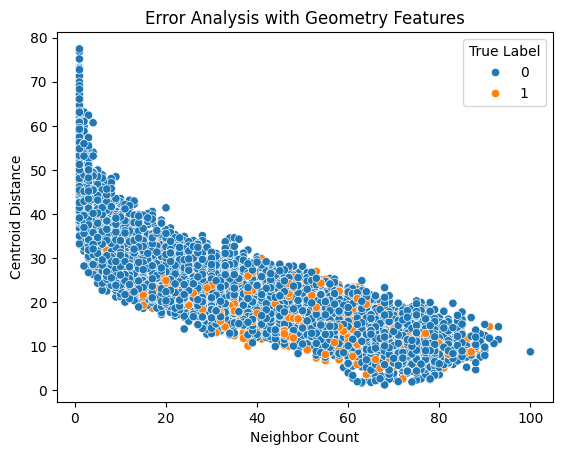

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=errors, x="Neighbor_Count", y="Centroid_Distance", hue="True_Label")
plt.title("Error Analysis with Geometry Features")
plt.xlabel("Neighbor Count")
plt.ylabel("Centroid Distance")
plt.legend(title="True Label")
plt.show()

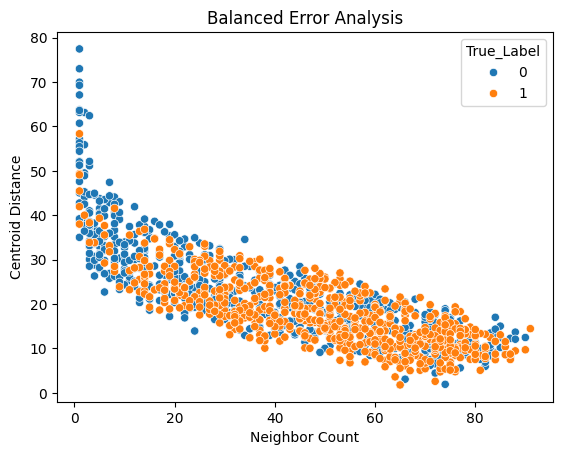

In [ ]:
from sklearn.utils import resample

# 将多数类别（0）随机下采样至与少数类别（1）数量相等
majority = errors[errors["True_Label"] == 0]
minority = errors[errors["True_Label"] == 1]

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
balanced_errors = pd.concat([majority_downsampled, minority])

# 绘制平衡后的图
sns.scatterplot(data=balanced_errors, x="Neighbor_Count", y="Centroid_Distance", hue="True_Label")
plt.title("Balanced Error Analysis")
plt.xlabel("Neighbor Count")
plt.ylabel("Centroid Distance")
plt.show()


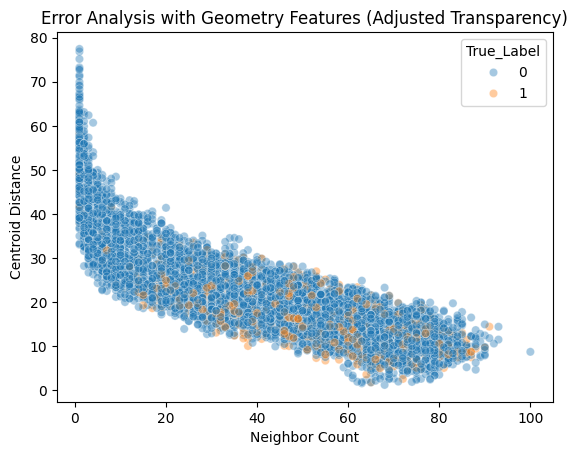

In [ ]:
sns.scatterplot(data=errors, x="Neighbor_Count", y="Centroid_Distance", hue="True_Label", alpha=0.4)
plt.title("Error Analysis with Geometry Features (Adjusted Transparency)")
plt.xlabel("Neighbor Count")
plt.ylabel("Centroid Distance")
plt.show()


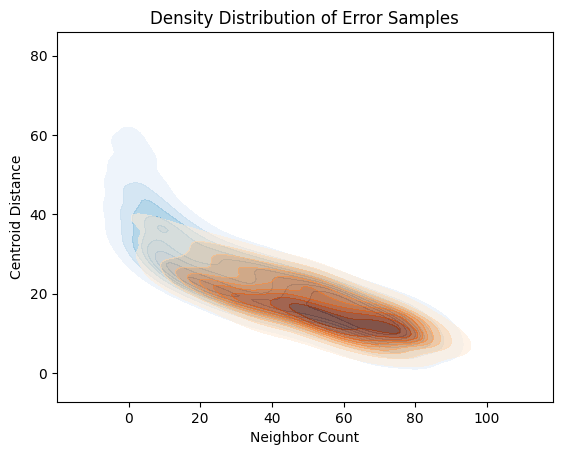

In [ ]:
sns.kdeplot(data=errors[errors["True_Label"] == 0], x="Neighbor_Count", y="Centroid_Distance", fill=True, cmap="Blues", alpha=0.6)
sns.kdeplot(data=errors[errors["True_Label"] == 1], x="Neighbor_Count", y="Centroid_Distance", fill=True, cmap="Oranges", alpha=0.6)
plt.title("Density Distribution of Error Samples")
plt.xlabel("Neighbor Count")
plt.ylabel("Centroid Distance")
plt.show()


## GNN

In [ ]:
!pip install torch torchvision torchaudio torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.9 MB/s eta 0:00:00


In [ ]:
merged_data=pd.read_csv("/content/drive/MyDrive/论文/merged_pdb_embedding_data_573.csv")

In [ ]:
merged_data.head()

,Label,ProteinID,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Residue_Number,ResidueID,ResidueName,Center_X,Center_Y,Center_Z
0,0,3a01_A,-0.052243,-0.413946,-0.220764,0.298519,-0.064640,-0.203552,-0.108073,-0.247184,...,-0.003672,0.140934,-0.088861,0.020745,1,3A01_A_1,ALA,-4.537917,27.498085,-10.769917
1,0,3a01_A,-0.392361,-0.278883,-0.164858,0.349221,-0.307164,0.031500,-0.008910,-0.161967,...,0.173155,0.079229,-0.425990,-0.119116,2,3A01_A_2,ARG,-9.727208,24.444586,-13.604293
2,0,3a01_A,0.037304,-0.106176,-0.191762,0.189156,-0.233975,0.365124,-0.013857,-0.345477,...,0.165696,0.200457,-0.293472,0.007811,3,3A01_A_3,ARG,-0.883208,21.883375,-12.131042
3,0,3a01_A,0.297728,-0.073661,-0.009382,-0.091957,0.025920,0.130138,-0.060305,-0.021202,...,-0.034040,0.231096,-0.160723,-0.133802,4,3A01_A_4,ILE,-5.965527,21.852053,-18.403473
4,0,3a01_A,0.347621,-0.120463,-0.054303,0.214193,0.066329,0.194008,-0.379981,-0.324756,...,0.373625,0.220124,-0.245808,0.000962,5,3A01_A_5,GLY,-3.686571,17.803715,-18.757427


In [ ]:
##注意，数据中的蛋白质id列的处理，目前的embedding没处理，但是在选择positive的时候会处理
# feature_y = merged_data.iloc[:, 0].values #提取 Label （0）列
# feature_X = np.zeros((feature_y.shape[0], 1), dtype=float) #创建一个全为 0 的占位数组
# feature_X = np.concatenate((feature_X,merged_data.iloc[:, 0:].values), axis=1) #将 merged_data 的所有列拼接到 feature_X
# feature_X = np.delete(feature_X, 0, axis=1) #删除占位列（第 0 列）

feature_y = merged_data['Label'].values
feature_X = merged_data.iloc[:, -3:].values

original_indices = np.arange(len(feature_y))  # 记录原始索引


# 2. 根据标签分为正负样本
positive_mask = feature_y == 1
negative_mask = feature_y == 0

feature_X_positive = feature_X[positive_mask]
feature_y_positive = feature_y[positive_mask]
positive_indices = original_indices[positive_mask]

feature_X_negative = feature_X[negative_mask]
feature_y_negative = feature_y[negative_mask]
negative_indices = original_indices[negative_mask]

# 3. 对正负样本分别拆分
# 返回数据和索引
feature_X_positive_train, feature_X_positive_test, feature_y_positive_train, feature_y_positive_test, positive_train_indices, positive_test_indices = train_test_split(
    feature_X_positive, feature_y_positive, positive_indices, test_size=0.3, random_state=1)

feature_X_negative_train, feature_X_negative_test, feature_y_negative_train, feature_y_negative_test, negative_train_indices, negative_test_indices = train_test_split(
    feature_X_negative, feature_y_negative, negative_indices, test_size=0.3, random_state=1)

# 4. 合并训练集和测试集数据
feature_X_train = np.concatenate((feature_X_positive_train, feature_X_negative_train), axis=0)
feature_y_train = np.concatenate((feature_y_positive_train, feature_y_negative_train), axis=0)
train_indices = np.concatenate((positive_train_indices, negative_train_indices), axis=0)

feature_X_test = np.concatenate((feature_X_positive_test, feature_X_negative_test), axis=0)
feature_y_test = np.concatenate((feature_y_positive_test, feature_y_negative_test), axis=0)
test_indices = np.concatenate((positive_test_indices, negative_test_indices), axis=0)

# 5. 检查结果
print("训练集大小:", feature_X_train.shape, feature_y_train.shape)
print("测试集大小:", feature_X_test.shape, feature_y_test.shape)
print("训练集索引:", train_indices)
print("测试集索引:", test_indices)

训练集大小: (110481, 3) (110481,)
测试集大小: (47350, 3) (47350,)
训练集索引: [ 53292  93424  73858 ...  54922   5547 140520]
测试集索引: [130314 126600 118941 ... 121479  52558 133706]


In [ ]:
print(feature_X[:10])

[[ -4.5379167  27.498085  -10.769917 ]
 [ -9.727208   24.444586  -13.604293 ]
 [ -0.8832083  21.883375  -12.131042 ]
 [ -5.9655266  21.852053  -18.403473 ]
 [ -3.6865714  17.803715  -18.757427 ]
 [ -0.953353   15.978412  -21.728884 ]
 [ -5.3479996  15.408214  -24.707073 ]
 [ -7.502572    8.682048  -23.731094 ]
 [ -7.9514117  11.793353  -28.567644 ]
 [ -2.5496428  13.220499  -27.629786 ]]


In [ ]:
print(feature_X_positive.shape)
print(feature_y_positive.shape)
print(feature_X_negative.shape)
print(feature_y_negative.shape)


(14788, 3)
(14788,)
(143043, 3)
(143043,)


In [ ]:
from sklearn.neighbors import KDTree
import torch

# 距离阈值
threshold = 4.5  # 需要根据数据分布调整

# 使用 KDTree 加速距离计算
tree = KDTree(feature_X_train)
neighbors = tree.query_radius(feature_X_train, r=threshold)

# 基于阈值生成边索引
edge_index = []
for i, neighbor_indices in enumerate(neighbors):
    for j in neighbor_indices:
        if i != j:  # 避免自环
            edge_index.append([i, j])

edge_index = torch.tensor(edge_index, dtype=torch.long).T  # 转置为 (2, num_edges)
print("Edge Index Shape:", edge_index.shape)



Edge Index Shape: torch.Size([2, 37016780])


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# 执行随机欠采样
rus = RandomUnderSampler(random_state=1, replacement=False)
X_balanced, y_balanced = rus.fit_resample(feature_X_train, feature_y_train)

# 获取欠采样后的索引
balanced_indices = rus.sample_indices_

print(f"Original train data size: {feature_X_train.shape[0]}")
print(f"Balanced train data size: {X_balanced.shape[0]}")
print(f"Balanced X shape: {X_balanced.shape}")
print(f"Balanced y shape: {y_balanced.shape}")

Original train data size: 110481
Balanced train data size: 20702
Balanced X shape: (20702, 3)
Balanced y shape: (20702,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# 假设 train_balanced_indices 和 test_indices 已经生成

# 创建旧索引到新索引的映射
train_index_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(balanced_indices)}
test_index_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(test_indices)}

# 初始化新的 edge_index 列表
train_new_edge_index = []
test_new_edge_index = []

# 遍历原始 edge_index
for i, j in edge_index.T.numpy():  # 原始 edge_index
    # 对于训练数据
    if i in train_index_mapping and j in train_index_mapping:
        train_new_edge_index.append([train_index_mapping[i], train_index_mapping[j]])

    # 对于测试数据
    if i in test_index_mapping and j in test_index_mapping:
        test_new_edge_index.append([test_index_mapping[i], test_index_mapping[j]])

# 转换为 PyTorch 张量并转置为 (2, num_edges)
train_new_edge_index = torch.tensor(train_new_edge_index, dtype=torch.long).T
test_new_edge_index = torch.tensor(test_new_edge_index, dtype=torch.long).T

# 打印结果
print("Train Edge Index Shape:", train_new_edge_index.shape)
print("Test Edge Index Shape:", test_new_edge_index.shape)



Train Edge Index Shape: torch.Size([2, 1444278])
Test Edge Index Shape: torch.Size([2, 3331726])


In [ ]:
from torch_geometric.data import Data
import torch

train_data = Data(
    x=torch.tensor(X_balanced, dtype=torch.float),  # 训练节点特征
    edge_index=train_new_edge_index,  # 训练边索引
    y=torch.tensor(y_balanced, dtype=torch.long)  # 训练节点标签
)

test_data = Data(
    x=torch.tensor(feature_X_test, dtype=torch.float),  # 测试节点特征
    edge_index=test_new_edge_index,  # 测试边索引
    y=torch.tensor(feature_y_test, dtype=torch.long)  # 测试节点标签
)


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, dropout=0.5):  # 新增 dropout 参数
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = dropout  # 保存 dropout 概率

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)  # 在中间层加入 Dropout
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)  # 再次加入 Dropout
        x = self.fc(x)
        return x

In [ ]:
from torch.optim import Adam  # 确保优化器被导入
from torch.nn import BCEWithLogitsLoss

# 初始化模型、优化器和损失函数
model = GCN(input_dim=train_data.x.shape[1], hidden_dim=64, output_dim=1)
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = BCEWithLogitsLoss()

# 训练
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 前向传播
    train_output = model(train_data)
    train_loss = criterion(train_output.squeeze(), train_data.y.float())

    # 反向传播
    train_loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss.item():.4f}")



model = GCN(input_dim=train_data.x.shape[1], hidden_dim=64, output_dim=1)
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = BCEWithLogitsLoss()

# 训练
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 前向传播
    train_output = model(train_data)
    train_loss = criterion(train_output.squeeze(), train_data.y.float())

    # 反向传播
    train_loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss.item():.4f}")


Epoch 1/50, Train Loss: 0.9758
Epoch 2/50, Train Loss: 1.0581
Epoch 3/50, Train Loss: 0.8515
Epoch 4/50, Train Loss: 0.8207
Epoch 5/50, Train Loss: 0.8023
Epoch 6/50, Train Loss: 0.7616
Epoch 7/50, Train Loss: 0.7257
Epoch 8/50, Train Loss: 0.7078
Epoch 9/50, Train Loss: 0.7008
Epoch 10/50, Train Loss: 0.7000
Epoch 11/50, Train Loss: 0.6977
Epoch 12/50, Train Loss: 0.6975
Epoch 13/50, Train Loss: 0.6970
Epoch 14/50, Train Loss: 0.6956
Epoch 15/50, Train Loss: 0.6955
Epoch 16/50, Train Loss: 0.6944
Epoch 17/50, Train Loss: 0.6936
Epoch 18/50, Train Loss: 0.6919
Epoch 19/50, Train Loss: 0.6929
Epoch 20/50, Train Loss: 0.6913
Epoch 21/50, Train Loss: 0.6922
Epoch 22/50, Train Loss: 0.6915
Epoch 23/50, Train Loss: 0.6903
Epoch 24/50, Train Loss: 0.6902
Epoch 25/50, Train Loss: 0.6894
Epoch 26/50, Train Loss: 0.6899
Epoch 27/50, Train Loss: 0.6881
Epoch 28/50, Train Loss: 0.6881
Epoch 29/50, Train Loss: 0.6883
Epoch 30/50, Train Loss: 0.6878
Epoch 31/50, Train Loss: 0.6886
Epoch 32/50, Trai

In [ ]:
model.eval()
with torch.no_grad():
    test_output = model(test_data)
    test_loss = criterion(test_output.squeeze(), test_data.y.float())

    # 转换为预测概率
    test_preds = torch.sigmoid(test_output).cpu().numpy()
    test_preds = (test_preds > 0.5).astype(int)  # 二分类阈值为 0.5

    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.6979


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, matthews_corrcoef
test_labels = test_data.y.cpu().numpy()

# 计算指标
accuracy = accuracy_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
specificity = recall_score(test_labels, test_preds, pos_label=0)
f1 = f1_score(test_labels, test_preds)
mcc = matthews_corrcoef(test_labels, test_preds)
auc_roc = roc_auc_score(test_labels, test_output)

# 计算AUC-PR
precision, recall_vals, _ = precision_recall_curve(test_labels, test_output)
auc_pr = auc(recall_vals, precision)

# 打印结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity/Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")






Accuracy: 0.1985
Sensitivity/Recall: 0.8720
Specificity: 0.1289
F1-score: 0.1694
MCC: 0.0008
AUC-ROC: 0.5164
AUC-PR: 0.1042


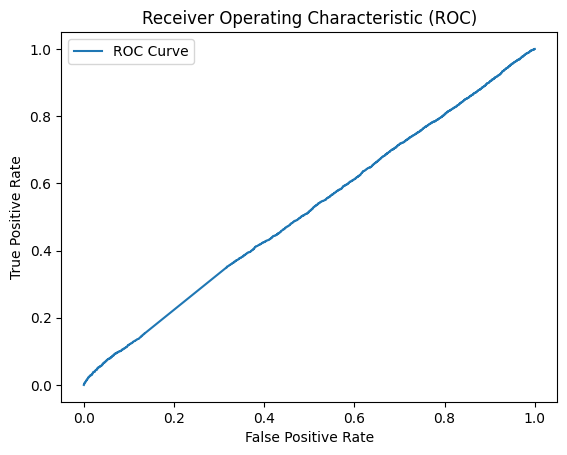

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, torch.sigmoid(test_output).cpu().numpy())
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.show()


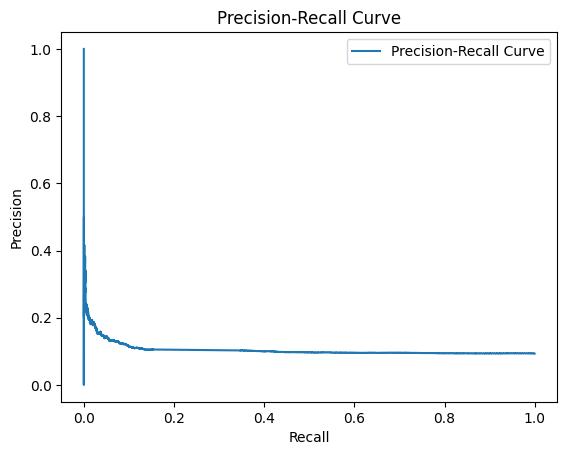

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_labels, torch.sigmoid(test_output).cpu().numpy())
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()



In [ ]:
import optuna
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss

# 验证函数，返回验证集损失
def validate(model, test_data, criterion):
    model.eval()  # 切换到评估模式
    with torch.no_grad():  # 禁止梯度计算
        test_output = model(test_data)  # 前向传播
        test_loss = criterion(test_output.squeeze(), test_data.y.float())  # 计算验证集损失
    return test_loss.item()

# 目标函数，定义超参数搜索空间
def objective(trial):
    # 定义超参数搜索空间
    hidden_dim = trial.suggest_categorical("hidden_dim", [64, 128, 256])
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    dropout = trial.suggest_uniform("dropout", 0.1, 0.5)

    # 初始化模型和优化器
    input_dim = train_data.x.shape[1]  # 输入特征维度
    model = GCN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=1)
    optimizer = Adam(model.parameters(), lr=lr)
    criterion = BCEWithLogitsLoss()

    # 模型训练
    model.train()
    for epoch in range(50):  # 假设训练50轮
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_data.y.float())
        train_loss.backward()
        optimizer.step()

    # 验证集评估
    val_loss = validate(model, test_data, criterion)
    return val_loss

# 使用 Optuna 进行超参数优化
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)
print("Best hyperparameters:", study.best_params)


[I 2024-12-24 15:32:12,369] A new study created in memory with name: no-name-d094e5bb-0c37-48a2-9c31-90cbc67616a6
<ipython-input-29-af95cbb0fd5e>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
<ipython-input-29-af95cbb0fd5e>:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.1, 0.5)
[I 2024-12-24 15:33:07,396] Trial 0 finished with value: 0.70188969373703 and parameters: {'hidden_dim': 64, 'lr': 0.00012415070975608004, 'dropout': 0.49581635210999275}. Best is trial 0 with value: 0.70188969373703.
[I 2024-12-24 15:34:02,113] Trial 1 finished with value: 0.7035936117172241 and parameters: {'hidde

Best hyperparameters: {'hidden_dim': 64, 'lr': 0.00010386933850431666, 'dropout': 0.2783809951320768}


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


## 结合Meta


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attention_weights = nn.Linear(input_dim * 2, 1)  # 用于计算融合权重

    def forward(self, blp, gcn_output):
        # 将 BLP 和 GCN_output 拼接
        combined = torch.cat((blp, gcn_output), dim=1)  # (batch_size, input_dim * 2)

        # 计算注意力权重
        alpha = torch.sigmoid(self.attention_weights(combined))  # (batch_size, 1)

        # 根据权重融合两种输入
        output = alpha * blp + (1 - alpha) * gcn_output  # (batch_size, input_dim)

        return output, alpha  # 输出融合后的特征和注意力权重



In [ ]:
class MetaLayer(nn.Module):
    def __init__(self, input_dim, attention_dim, output_dim):
        super(MetaLayer, self).__init__()
        self.fc1 = nn.Linear(input_dim + attention_dim, 128)  # 第一层
        self.fc2 = nn.Linear(128, output_dim)  # 输出层

    def forward(self, embedding_data, attention_output):
        combined = torch.cat((embedding_data, attention_output), dim=1)  # 融合输入
        x = F.relu(self.fc1(combined))
        output = torch.sigmoid(self.fc2(x))  # 输出分类概率
        return output


In [ ]:
class StackedAttentionModel(nn.Module):
    def __init__(self, blp_dim, gcn_dim, embedding_dim, meta_output_dim):
        super(StackedAttentionModel, self).__init__()
        self.attention_layer = AttentionLayer(blp_dim)  # Attention 层
        self.meta_layer = MetaLayer(embedding_dim, blp_dim, meta_output_dim)  # Meta 层

    def forward(self, blp, gcn_output, embedding_data):
        # Attention 融合
        attention_output, attention_weights = self.attention_layer(blp, gcn_output)

        # Meta 层分类
        output = self.meta_layer(embedding_data, attention_output)
        return output, attention_weights


In [ ]:
import pickle
BLP_train = load_model_and_get_BLP(X_embedding_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking cod

In [ ]:
from joblib import dump

# 假设 BLP_train 是你需要保存的对象
dump(BLP_train, 'BLP_train.joblib')
print("BLP_train 已成功保存到本地！")


BLP_train 已成功保存到本地！


In [ ]:
X = np.concatenate((X_embedding_train, BLP_train), axis=1)
y_pred, y_proba = load_the_pickle_files_meta_layer(X)

In [ ]:
results_df = pd.DataFrame({
    "True_Label": y_train,                     # 真实标签
    "Predicted_Label": y_pred,           # 预测标签
    "Predicted_Probability": [max(prob) for prob in y_proba]  # 最大预测概率
})

# 保存到 CSV 文件
results_file = "embedding train_predictions.csv"
results_df.to_csv(results_file, index=False)

print(f"详细预测结果已保存到文件：{results_file}")

详细预测结果已保存到文件：embedding train_predictions.csv


In [ ]:
results_df.head()

,True_Label,Predicted_Label,Predicted_Probability
0,0,0,0.752028
1,0,1,0.505011
2,0,0,0.708764
3,0,0,0.508314
4,0,0,0.974219


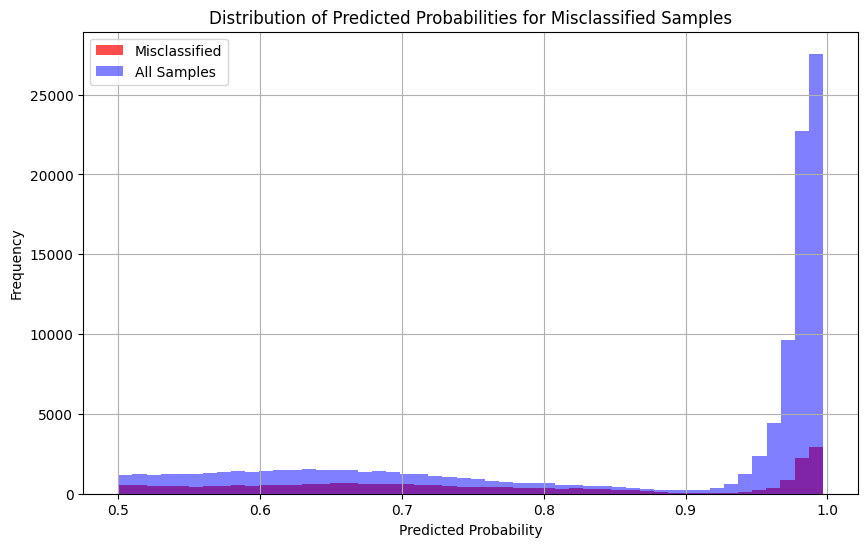

In [ ]:
# 找出预测错误的样本
misclassified_indices = results_df.index[results_df['True_Label'] != results_df['Predicted_Label']]

# 观察这些样本的置信度分布
plt.figure(figsize=(10, 6))
plt.hist(results_df.loc[misclassified_indices, 'Predicted_Probability'], bins=50, alpha=0.7, color='red', label='Misclassified')
plt.hist(results_df['Predicted_Probability'], bins=50, alpha=0.5, color='blue', label='All Samples')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Predicted Probabilities for Misclassified Samples")
plt.grid(True)
plt.show()


In [ ]:
merged_data=pd.read_csv("/content/drive/MyDrive/论文/merged_pdb_embedding_data_573.csv")

In [ ]:
from sklearn.model_selection import train_test_split

# 获取嵌入数据和结构空间数据
X_embedding = merged_data.iloc[:, 3:1027].values  # 第 3 列到第 1027 列
X_structure = merged_data.iloc[:, -3:].values    # 倒数第 3 列到最后一列
y = merged_data.iloc[:, 0].values                # 第一列为标签

# 按照 70:30 的比例划分训练集和验证集
X_embedding_train, X_embedding_val, X_structure_train, X_structure_val, y_train, y_val = train_test_split(
    X_embedding, X_structure, y, test_size=0.3, random_state=1
)

# 输出数据集大小确认
print(f"X_embedding_train shape: {X_embedding_train.shape}")
print(f"X_embedding_val shape: {X_embedding_val.shape}")
print(f"X_structure_train shape: {X_structure_train.shape}")
print(f"X_structure_val shape: {X_structure_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_embedding_train shape: (110481, 1024)
X_embedding_val shape: (47350, 1024)
X_structure_train shape: (110481, 3)
X_structure_val shape: (47350, 3)
y_train shape: (110481,)
y_val shape: (47350,)


In [ ]:
# 提取正样本的特征和标签
positive_indices = (y_train == 1)  # 筛选正样本索引
negative_indices = (y_train == 0)  # 筛选负样本索引
X_pdb_positive = X_structure_train[positive_indices]  # 正样本特征，注意，仍然是训练集中的正样本
X_pdb_negative = X_structure_train[negative_indices]  # 负样本特征
y_positive = y_train[positive_indices]  # 正样本标签
y_negative = y_train[negative_indices]
print(f"正样本数量: {len(y_positive)}, 特征维度: {X_pdb_positive.shape[1]}")
print(f"负样本数量: {len(y_negative)}, 特征维度: {X_pdb_negative.shape[1]}")


正样本数量: 10347, 特征维度: 3
负样本数量: 100134, 特征维度: 3


In [ ]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# 设置负样本的抽样比例
sample_ratio = 0.1  # 抽取10%的负样本
negative_sample_size = int(len(X_pdb_negative) * sample_ratio)  # 计算抽样数量

# 随机抽样负样本
np.random.seed(1)  # 固定随机种子，确保抽样可重复
sampled_negative_indices = np.random.choice(len(X_pdb_negative), negative_sample_size, replace=False)
sampled_negative_coords = X_pdb_negative[sampled_negative_indices]  # 获取抽样后的负样本坐标

# 计算正样本距离
distance_matrix_P = squareform(pdist(X_pdb_positive))  # 正样本两两距离
distances_P = distance_matrix_P[np.triu_indices_from(distance_matrix_P, k=1)]  # 取上三角部分

# 计算抽样负样本距离
distance_matrix_N = squareform(pdist(sampled_negative_coords))  # 抽样负样本两两距离
distances_N = distance_matrix_N[np.triu_indices_from(distance_matrix_N, k=1)]  # 取上三角部分


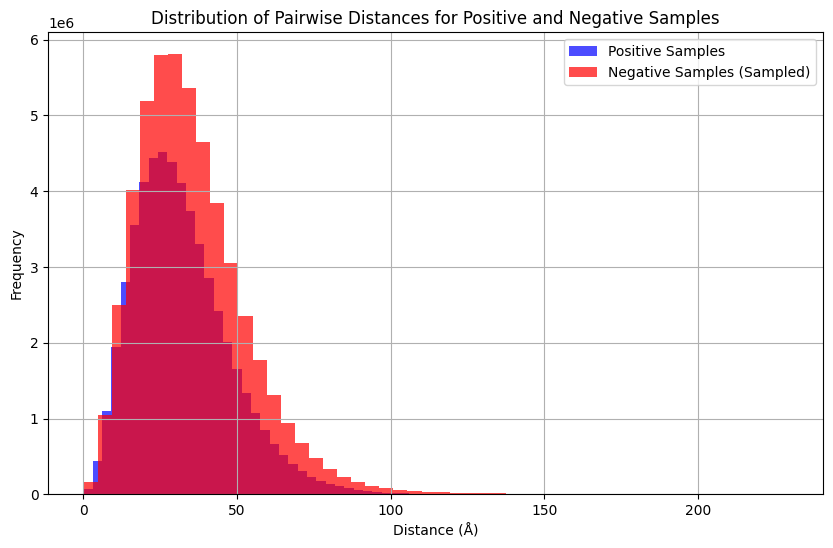

In [ ]:
# 绘制距离分布直方图
plt.figure(figsize=(10, 6))
plt.hist(distances_P, bins=50, alpha=0.7, color='blue', label='Positive Samples')
plt.hist(distances_N, bins=50, alpha=0.7, color='red', label='Negative Samples (Sampled)')
plt.xlabel("Distance (Å)")
plt.ylabel("Frequency")
plt.title("Distribution of Pairwise Distances for Positive and Negative Samples")
plt.legend()
plt.grid()
plt.show()

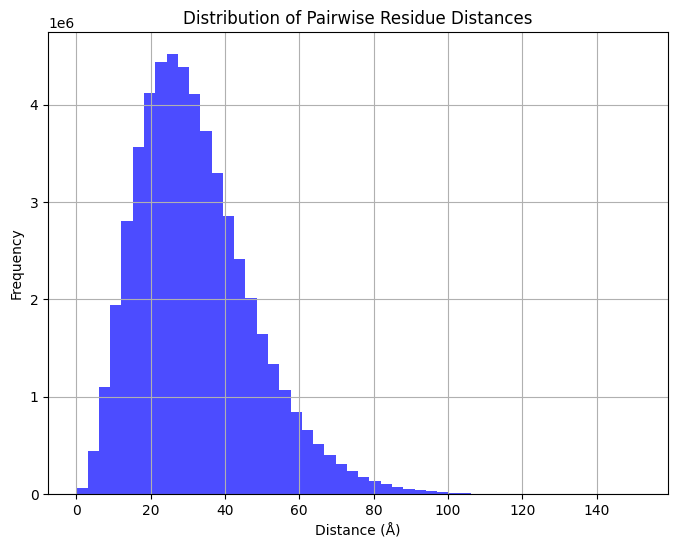

In [ ]:
import matplotlib.pyplot as plt

# 绘制距离分布直方图
plt.figure(figsize=(10, 6))
plt.hist(distances_P, bins=50, alpha=0.7, color='blue', label='Positive Samples')
plt.hist(distances_N, bins=50, alpha=0.7, color='red', label='Negative Samples')
plt.xlabel("Distance (Å)")
plt.ylabel("Frequency")
plt.title("Distribution of Pairwise Distances for Positive and Negative Samples")
plt.legend()
plt.grid()
plt.show()



In [ ]:
from sklearn.neighbors import KDTree
import torch

# 距离阈值
threshold = 4  # 需要根据数据分布调整

# 使用 KDTree 加速距离计算
tree = KDTree(X_pdb_positive)
neighbors = tree.query_radius(X_pdb_positive, r=threshold)

# 基于阈值生成边索引
edge_index = []
for i, neighbor_indices in enumerate(neighbors):
    for j in neighbor_indices:
        if i != j:  # 避免自环
            edge_index.append([i, j])

edge_index = torch.tensor(edge_index, dtype=torch.long).T  # 转置为 (2, num_edges)
print("Edge Index Shape:", edge_index.shape)

Edge Index Shape: torch.Size([2, 283758])


In [ ]:
# 统计每个节点的邻居数
num_neighbors = torch.bincount(edge_index[0])  # 统计每个节点的出边数

# 打印统计信息
print(f"平均邻居数: {num_neighbors.float().mean():.2f}")
print(f"最大邻居数: {num_neighbors.max().item()}")
print(f"最小邻居数: {num_neighbors.min().item()}")

平均邻居数: 27.42
最大邻居数: 87
最小邻居数: 0


In [ ]:
from torch_geometric.data import Data
import torch
from torch_geometric.data import Data

# 创建图数据对象
graph_data = Data(
    x=torch.tensor(X_pdb_positive, dtype=torch.float),  # 节点特征（正样本特征）
    edge_index=edge_index,  # 边索引（邻接关系）
    y=torch.tensor(y_train[positive_indices], dtype=torch.long)  # 节点标签（正样本标签）
)

print(graph_data)


Data(x=[10347, 3], edge_index=[2, 283758], y=[10347])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, dropout=0.5):  # 新增 dropout 参数
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = dropout  # 保存 dropout 概率

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)  # 图卷积层1
        x = F.relu(x)                 # 激活函数
        x = self.conv2(x, edge_index) # 图卷积层2
        return F.log_softmax(x, dim=1)  # 输出概率分布

In [ ]:
# 模型初始化
input_dim = graph_data.num_node_features  # 输入特征维度
hidden_dim = 32  # 隐藏层大小
output_dim = 2  # 输出类别（正样本或负样本）

gcn_model = GCN(input_dim, hidden_dim, output_dim)
print(gcn_model)

GCN(
  (conv1): GCNConv(3, 32)
  (conv2): GCNConv(32, 32)
  (fc): Linear(in_features=32, out_features=2, bias=True)
)


In [ ]:
from torch_geometric.loader import DataLoader
from torch.optim import Adam

# 创建 DataLoader
loader = DataLoader([graph_data], batch_size=1, shuffle=True)

# 定义优化器
optimizer = Adam(gcn_model.parameters(), lr=0.01, weight_decay=5e-4)

# 训练模型
gcn_model.train()
for epoch in range(50):  # 训练 50 个 epoch
    for batch in loader:
        optimizer.zero_grad()
        out = gcn_model(batch.x, batch.edge_index)  # 模型前向传播
        loss = F.nll_loss(out, batch.y)  # 计算交叉熵损失
        loss.backward()  # 反向传播
        optimizer.step()  # 参数更新
    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 3.8057
Epoch 2, Loss: 2.3370
Epoch 3, Loss: 1.3520
Epoch 4, Loss: 0.7384
Epoch 5, Loss: 0.3812
Epoch 6, Loss: 0.1904
Epoch 7, Loss: 0.0973
Epoch 8, Loss: 0.0554
Epoch 9, Loss: 0.0356
Epoch 10, Loss: 0.0248
Epoch 11, Loss: 0.0183
Epoch 12, Loss: 0.0140
Epoch 13, Loss: 0.0111
Epoch 14, Loss: 0.0090
Epoch 15, Loss: 0.0075
Epoch 16, Loss: 0.0064
Epoch 17, Loss: 0.0055
Epoch 18, Loss: 0.0048
Epoch 19, Loss: 0.0043
Epoch 20, Loss: 0.0038
Epoch 21, Loss: 0.0035
Epoch 22, Loss: 0.0032
Epoch 23, Loss: 0.0029
Epoch 24, Loss: 0.0027
Epoch 25, Loss: 0.0026
Epoch 26, Loss: 0.0024
Epoch 27, Loss: 0.0023
Epoch 28, Loss: 0.0022
Epoch 29, Loss: 0.0021
Epoch 30, Loss: 0.0020
Epoch 31, Loss: 0.0019
Epoch 32, Loss: 0.0019
Epoch 33, Loss: 0.0018
Epoch 34, Loss: 0.0018
Epoch 35, Loss: 0.0018
Epoch 36, Loss: 0.0017
Epoch 37, Loss: 0.0017
Epoch 38, Loss: 0.0017
Epoch 39, Loss: 0.0017
Epoch 40, Loss: 0.0016
Epoch 41, Loss: 0.0016
Epoch 42, Loss: 0.0016
Epoch 43, Loss: 0.0016
Epoch 44, Loss: 0.00

In [ ]:
# 模型切换到评估模式
gcn_model.eval()

# 对所有节点进行预测
out = gcn_model(graph_data.x, graph_data.edge_index)
predictions = out.argmax(dim=1)  # 获取预测类别

# 打印预测结果
print("预测类别：", predictions.tolist())


预测类别： [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
results_df=pd.read_csv("/content/embedding train_predictions.csv")

In [ ]:
results_df['Probability_Adjusted'] = results_df.apply(
    lambda row: 1 - row['Predicted_Probability'] if row['Predicted_Label'] == 0 else row['Predicted_Probability'],
    axis=1
)


In [ ]:
results_df.head()

,True_Label,Predicted_Label,Predicted_Probability,Probability_Adjusted
0,0,0,0.752027,0.247973
1,0,1,0.505011,0.505011
2,0,0,0.708764,0.291236
3,0,0,0.508314,0.491686
4,0,0,0.974219,0.025781


In [ ]:
results_df.shape

(110481, 3)

In [ ]:
merged_data.head()

,Label,ProteinID,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Residue_Number,ResidueID,ResidueName,Center_X,Center_Y,Center_Z
0,0,3a01_A,-0.052243,-0.413946,-0.220764,0.298519,-0.064640,-0.203552,-0.108073,-0.247184,...,-0.003672,0.140934,-0.088861,0.020745,1,3A01_A_1,ALA,-4.537917,27.498085,-10.769917
1,0,3a01_A,-0.392361,-0.278883,-0.164858,0.349221,-0.307164,0.031500,-0.008910,-0.161967,...,0.173155,0.079229,-0.425990,-0.119116,2,3A01_A_2,ARG,-9.727208,24.444586,-13.604293
2,0,3a01_A,0.037304,-0.106176,-0.191762,0.189156,-0.233975,0.365124,-0.013857,-0.345477,...,0.165696,0.200457,-0.293472,0.007811,3,3A01_A_3,ARG,-0.883208,21.883375,-12.131042
3,0,3a01_A,0.297728,-0.073661,-0.009382,-0.091957,0.025920,0.130138,-0.060305,-0.021202,...,-0.034040,0.231096,-0.160723,-0.133802,4,3A01_A_4,ILE,-5.965527,21.852053,-18.403473
4,0,3a01_A,0.347621,-0.120463,-0.054303,0.214193,0.066329,0.194008,-0.379981,-0.324756,...,0.373625,0.220124,-0.245808,0.000962,5,3A01_A_5,GLY,-3.686571,17.803715,-18.757427


In [ ]:
merged_data.shape

(157831, 1032)

In [ ]:
X_structure_train.shape

(110481, 3)

In [ ]:
result_train_positive = results_df[positive_indices]

In [ ]:
result_train_positive.shape

(10347, 4)

In [ ]:
result_train_positive.head()

,True_Label,Predicted_Label,Predicted_Probability,Probability_Adjusted
9,1,0,0.544192,0.455808
17,1,1,0.793863,0.793863
25,1,0,0.957566,0.042434
27,1,0,0.911457,0.088543
50,1,0,0.981088,0.018912


In [ ]:
X_pdb_positive.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

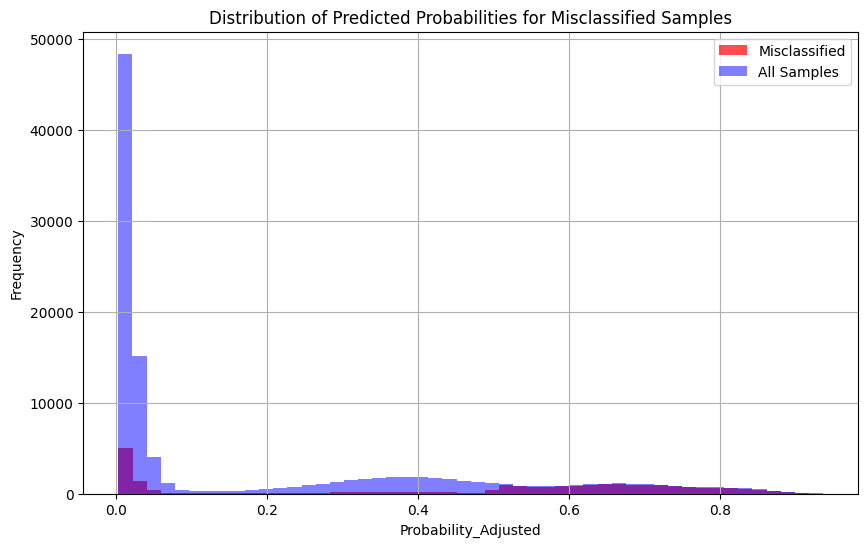

In [ ]:
# 找出预测错误的样本
misclassified_indices = results_df.index[results_df['True_Label'] != results_df['Predicted_Label']]

# 观察这些样本的置信度分布
plt.figure(figsize=(10, 6))
plt.hist(results_df.loc[misclassified_indices, 'Probability_Adjusted'], bins=50, alpha=0.7, color='red', label='Misclassified')
plt.hist(results_df['Probability_Adjusted'], bins=50, alpha=0.5, color='blue', label='All Samples')
plt.xlabel("Probability_Adjusted")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Predicted Probabilities for Misclassified Samples")
plt.grid(True)
plt.show()


In [ ]:
# 调整置信度阈值
low_confidence_threshold = 0.3  # 根据分布特征设置

# 提取低置信度样本的索引
low_confidence_indices = result_train_positive.index[result_train_positive['Probability_Adjusted'] < low_confidence_threshold]

# 提取低置信度样本对应的特征
low_confidence_features = torch.tensor(X_structure_train[low_confidence_indices], dtype=torch.float)

# 确保索引和特征一致性
print(f"Low Confidence Samples: {len(low_confidence_indices)}")


Low Confidence Samples: 7416


In [ ]:
low_confidence_indices

Index([    25,     27,     50,     55,     96,    140,    164,    167,    196,
          239,
       ...
       110324, 110349, 110380, 110381, 110408, 110409, 110435, 110445, 110449,
       110473],
      dtype='int64', length=7416)

In [ ]:
# 创建低置信度样本的新索引映射
low_confidence_node_map = {old_idx: new_idx for new_idx, old_idx in enumerate(low_confidence_indices)}

# 构建针对低置信度样本的 edge_index
filtered_edge_index = []
for src, dst in edge_index.T.tolist():  # 原始 edge_index 转成 list
    if src in low_confidence_node_map and dst in low_confidence_node_map:
        filtered_edge_index.append([
            low_confidence_node_map[src],
            low_confidence_node_map[dst]
        ])

# 转换为 tensor 格式
filtered_edge_index = torch.tensor(filtered_edge_index, dtype=torch.long).T
print(f"Filtered Edge Index Shape: {filtered_edge_index.shape}")


Filtered Edge Index Shape: torch.Size([2, 1494])


In [ ]:
# 切换到评估模式
gcn_model.eval()

# 使用 GCN 模型重新预测低置信度样本
low_confidence_predictions = gcn_model(low_confidence_features, filtered_edge_index).argmax(dim=1).numpy()

print(f"Low Confidence Predictions Shape: {low_confidence_predictions.shape}")


Low Confidence Predictions Shape: (84929,)


In [ ]:
# Step 3: 更新结果
results_df.loc[low_confidence_indices, 'Updated_Predicted_Label'] = (low_confidence_predictions > 0.5).astype(int)

# Step 4: 动态评估改进效果
original_accuracy = (results_df['Predicted_Label'] == results_df['True_Label']).mean()
updated_accuracy = (results_df[
'Updated_Predicted_Label'].fillna(results_df['Predicted_Label']) == results_df['True_Label']).mean()
print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Updated Accuracy: {updated_accuracy:.4f}")
print(f"Accuracy Improvement: {updated_accuracy - original_accuracy:.4f}")


Original Accuracy: 0.7756
Updated Accuracy: 0.0937
Accuracy Improvement: -0.6819


In [ ]:
# 原始预测正确数量
original_correct = (result_train_positive['Predicted_Label'] == result_train_positive['True_Label']).sum()

# 原始预测精度
original_accuracy = original_correct / len(result_train_positive)
print(f"Original Accuracy: {original_accuracy:.4f}")


Original Accuracy: 0.1443


In [ ]:
# 检查是否所有样本都有更新的预测结果，否则填充为原始预测
result_train_positive['Final_Predicted_Label'] = result_train_positive['Updated_Predicted_Label'].fillna(result_train_positive['Predicted_Label'])

# 更新后预测正确数量
updated_correct = (result_train_positive['Final_Predicted_Label'] == result_train_positive['True_Label']).sum()

# 更新后预测精度
updated_accuracy = updated_correct / len(result_train_positive)
print(f"Updated Accuracy: {updated_accuracy:.4f}")


Updated Accuracy: 1.0000


<ipython-input-68-e81423d6e300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_train_positive['Final_Predicted_Label'] = result_train_positive['Updated_Predicted_Label'].fillna(result_train_positive['Predicted_Label'])


In [ ]:
accuracy_improvement = updated_accuracy - original_accuracy
print(f"Accuracy Improvement: {accuracy_improvement:.4f}")


Accuracy Improvement: 0.8557
